# MoneyLion Data Science Assessment

## Table Of Contents:
1. [Background](#background)
    - 1.1 [Initial Setup](#setup)
    - 1.2 [Hypothesis](#hypothesis)
    
    
2. [Data Cleaning](#cleaning)
    - 2.1 [Loans](#loans)
    - 2.2 [Payment](#payment)
    - 2.3 [Clarity](#clarity)
    - 2.4 [Joining The Datasets](#join)
    
    
3. [Exploratory Data Analysis](#eda)
    - 3.1 [Loan Exploratory Data Analysis](#leda)
        - 3.1.1 [Loan Amount/Originally Scheduled Amount](#loanAmount)
        - 3.1.2 [nPaidOff](#nPaidOff)
        - 3.1.3 [payFrequency](#payFrequency)
        - 3.1.4 [State](#state)
        - 3.1.4 [Application Date](#date)
        - 3.1.4 [Lead Cost/Lead Type](#lead)
    - 3.2 [Clarity Fraud Report Exploratory Data Analysis](#ceda)
    
    
4. [Modelling](#modelling)
    - 4.1 [Data Preprocessing](#preprocessing)
    - 4.2 [Model Training](#training)
    - 4.3 [Model Evaluation](#evaluation)
 
5. [Conclusion](#conclusion)
    - 5.1 [Improvements](#improvements)

## 1. Background <a class="anchor" id="background"></a>
Based on the brief provided, a simplified explanation of the task is to model the 'loan quality' for a given loan application. 

Without any previous knowledge on loans, before diving into the code my first course of action was to read up on the fields provided, understand terminology and the loan process (underwriting, leads, etc.). 

The first issue to tackle is determining a metric for 'loan quality'. The dataset does not provide a direct metric for 'loan quality' hence this metric first has to be defined from the given fields of data. There is a 'clarity fraud score' which calculates the probability of a given applicant defaulting which may provide meaningful insight on the risk associated with the applicant but is not equivalent to 'loan quality'. 

### 1.1 Initial Setup<a class="anchor" id="setup"></a>

In [1]:
# Data analysis packages
import pandas as pd
import numpy as np
from datetime import timedelta

# Visualisation packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
a4_dims = (11.7, 8.27) #define a4 size

In order to define the hypotheses that will lead this analysis, it is first needed to know which information is available in the dataset (attributes). The dataset is split into 3 different files. Thus, the first lines of the dataset are shown below:

In [2]:
loan = pd.read_csv("data/data/loan.csv")
payment = pd.read_csv("data/data/payment.csv")
clarity = pd.read_csv("data/data/clarity_underwriting_variables.csv")

C:\Users\User\Miniconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [4]:
payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [5]:
clarity.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


### 1.2 Hypotheses to be explored<a class="anchor" id="hypothesis"></a>

1. Regarding the loans dataset
    - What is the percentage of loan applications that are approved and/or funded?
    - How many loans have a clarity fraud report?
    - Which states account for the higher performing loans?
    - What is the distribution for the loan amounts and does it affect the quality of a loan?
    - Which type of loans perform the best/has the best repayment?
2. Regarding the payments dataset
    - Currently multiple payments for a given loan. Need to aggregate so it can be joined with the loans dataset
    - How many loans have payments which did not go through?
    - Does payment amount affect their ability to pay off the loan?
    - Does a loan with a collection payment perform better or worse?
3. Regarding clarity dataset
    - What is the distribution of clear fraud score? Is it a good metric for loan repayability?
    - How does clear fraud score reflect the ability of a given loan to be successfully repaid?
    - Do the other fields even matter? Or is just clear fraud score a good attribute (since it should already take into account the other attributes in its' calculation)
4. Regarding the dataset overall
    - How many of the loans have a corresponding payment history?
    - How many loans have a corresponding clarity fraud report available in the clarity dataset?
    - Can the risk of a loan be modelled without a history of payments? Does the given dataset allow for it?

## 2. Data Cleaning<a class="anchor" id="cleaning"></a>
Data will be loaded and some operations will be performed to inspect data types, to look for missing values or possibly errant data.

The analysis will use two standard measures for loan quality. Ratio of charge-off to total loan amount and ratio of nonperforming loans to total loans. Charge-off is the amount that the bank determines is not repayable and hence lost and nonperforming loans are defined as loans which have payments that are 90 days or more past due.

The reason why two different loan metrics are used is because they represent different stages in the loan deterioration cycle. In the first stage, borrowers start making untimely payments which results in the loan becoming non-performing. In the second stage, the amount withstanding is then deemed to be 'charged off'. For the purpose of this investigation, we will try to model the ratio of charge-off to total loan amount as it is a more direct measure of profit and risk for a loan than nonperforming loans. However, both measures will be investigated as they provide good insight to loan performance for MoneyLion

### 2.1 Loans <a class="anchor" id="loans"></a>

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
loanId                              577426 non-null object
anon_ssn                            577682 non-null object
payFrequency                        576409 non-null object
apr                                 573760 non-null float64
applicationDate                     577682 non-null object
originated                          577682 non-null bool
originatedDate                      46044 non-null object
nPaidOff                            577658 non-null float64
approved                            577682 non-null bool
isFunded                            577682 non-null int64
loanStatus                          577291 non-null object
loanAmount                          575432 non-null float64
originallyScheduledPaymentAmount    577682 non-null float64
state                               577550 non-null object
leadType                            577682 non-null object
leadCo

Few things of note:
    - there are some null loanIDs, APRs and loanAmount, payFrequency, loanStatus, nPaidOff, state
    - roughly half the dataset does not have a clarityFraudId
    - fpStatus and originatedData is mostly null values
    - hasCF is a redundant field
    - For the categorical values, how many unique values are there for each attribute and how balanced are they?
    
First, let's investigate the null loanIDs

In [7]:
loan[loan['loanId'].isna()]

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
1668,NaN,8f53d4e3d17fb490a16468f940992475,B,NaN,2015-06-23T13:29:21.667000,False,NaN,0.0,False,0,NaN,NaN,0.0,TX,bvMandatory,3,No Payments,NaN,0
4749,NaN,ca89dd7de41d72d531311479cd9d166d,B,NaN,2016-01-07T06:04:47.937000,False,NaN,0.0,False,0,NaN,NaN,0.0,OH,bvMandatory,6,No Schedule,NaN,0
5970,NaN,5d5adaa9cabb297235b0223c6e7182fc,B,NaN,2016-01-07T06:14:41.987000,False,NaN,0.0,False,0,NaN,NaN,0.0,IL,bvMandatory,3,No Schedule,568e01e0e4b040f8ae2d2694,1
16229,NaN,8e44524a86abe0db1f5c0f6afc9bbd7c,B,NaN,2016-06-15T03:15:05.401000,False,NaN,0.0,False,0,NaN,NaN,0.0,MI,bvMandatory,3,No Payments,5760c831e4b09f30d601f321,1
20193,NaN,213ad4d617b56bee5483f79837bcb6e6,B,NaN,2016-12-22T06:59:56.378000,False,NaN,0.0,False,0,NaN,NaN,0.0,AZ,lead,10,No Payments,585b79e7e4b08f24665c2b46,1
21191,NaN,6fb7174f109a89a35dab5d6e836b8bcb,W,NaN,2016-01-07T05:42:29.296000,False,NaN,0.0,False,0,NaN,NaN,0.0,MI,bvMandatory,3,No Schedule,NaN,0
21389,NaN,4f67ecbc254571de0623b541f5212567,B,NaN,2015-11-03T13:55:55.897000,False,NaN,0.0,False,0,NaN,NaN,0.0,MI,bvMandatory,3,No Schedule,NaN,0
22260,NaN,6547d474986024fb8b52f153b78f9ec4,M,NaN,2016-04-14T18:56:08.062000,False,NaN,0.0,False,0,NaN,NaN,0.0,TN,bvMandatory,3,No Schedule,NaN,0
28672,NaN,ad9e3854914a6ff3db13a42da6d3ccf0,B,NaN,2015-12-10T21:50:29.761000,False,NaN,0.0,False,0,NaN,NaN,0.0,SC,bvMandatory,6,No Schedule,NaN,0
30433,NaN,eb8dc1eafa970fb863a84903e84264ff,B,NaN,2016-01-07T05:15:00.046000,False,NaN,0.0,False,0,NaN,NaN,0.0,IL,bvMandatory,6,No Schedule,NaN,0


The null loan IDs have no apr, loanstatus or loan amount but some have associated clarity fraud reports. This could mean the data was entered erroniously or might have been corrupted on entry as these applications were underwritten and valid at some point. Nevertheless, we can drop these values as they are in the minority and do not provide any more insight

In [8]:
loan = loan[loan.loanId.notnull()]

Now lets confirm all values in the loanID column are unique and set it to be the index

In [9]:
loan.loanId.nunique() == loan.shape[0]
loan.set_index('loanId', drop=True, inplace=True)

Similarly, for null APRs

In [10]:
loan[(loan['apr'].isna()) | (loan['apr']<0)]

,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
loanId,,,,,,,,,,,,,,,,,,
LL-I-09584243,ffecddf04ba321d5cc545f252c3be2e1,B,NaN,2016-06-07T13:56:27.616000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.00,OH,bvMandatory,3,No Payments,56b402eae4b0044c2e7c3cad,1
LL-I-07917038,4bd3bb45e34c1c6d1dde8979425db2e4,B,NaN,2016-03-17T17:38:09.369000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.00,IL,bvMandatory,3,No Schedule,56eacae3e4b0b80162181347,1
LL-I-06502534,0079d6e4dafaf229cf87cf6d736cdd40,W,NaN,2016-01-14T18:03:33.105000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.00,WI,bvMandatory,6,No Schedule,566ee54fe4b05a5e4e2b5780,1
LL-I-00075891,fcec27156616a4cef522afea83ff8137,B,NaN,2014-12-29T22:17:33.096000,False,NaN,0.0,False,0,Withdrawn Application,600.0,1439.46,OH,lead,25,NaN,NaN,0
LL-I-00013706,ff228cdc9b2f22f6938ece851d44a5d2,B,NaN,2014-12-11T17:34:43.640000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1199.55,OH,lead,10,NaN,NaN,0
LL-I-05780879,c9b80d8aba176fd4301f1d835e3ae71e,B,NaN,2015-12-16T03:16:30.087000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.00,IL,bvMandatory,6,No Schedule,NaN,0
LL-I-12644912,2011b7e6ea08987d33fa4b033251e6ef,W,NaN,2016-12-07T19:14:24.760000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.00,WI,bvMandatory,3,No Payments,57d18c92e4b00f8581dfc338,1
LL-I-12035213,2a883ddc03d029a2dda58705e4340cba,B,NaN,2016-09-15T16:56:05.442000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.00,CA,bvMandatory,3,No Payments,57dad296e4b01a79d8a18e3a,1
LL-I-00017292,5bd17e65a6d45a848a157b3cfc17e62f,M,NaN,2014-12-12T09:37:22.387000,False,NaN,0.0,False,0,Withdrawn Application,400.0,2302.92,OH,lead,6,NaN,NaN,0


Unlike the case for null loan IDs, null APRs do have corresponsing loan IDs and loan statusses. No application with a null APR was approved and some have non-null loan amounts and clarity fraud reports. It could be possible that the APRs were not recorded for these loan applications but given that none of them were approved or funded, they do not provide additional insight for the task at hand.

They constitute for a minority of the data as well so they are dropped from the dataset

Similarly, for null loan amounts, payFrequency, loanStatus and state

In [11]:
loan[loan['loanAmount'].isna()]

,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
loanId,,,,,,,,,,,,,,,,,,
LL-I-09584243,ffecddf04ba321d5cc545f252c3be2e1,B,NaN,2016-06-07T13:56:27.616000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,OH,bvMandatory,3,No Payments,56b402eae4b0044c2e7c3cad,1
LL-I-07917038,4bd3bb45e34c1c6d1dde8979425db2e4,B,NaN,2016-03-17T17:38:09.369000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,IL,bvMandatory,3,No Schedule,56eacae3e4b0b80162181347,1
LL-I-06502534,0079d6e4dafaf229cf87cf6d736cdd40,W,NaN,2016-01-14T18:03:33.105000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,WI,bvMandatory,6,No Schedule,566ee54fe4b05a5e4e2b5780,1
LL-I-05780879,c9b80d8aba176fd4301f1d835e3ae71e,B,NaN,2015-12-16T03:16:30.087000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,IL,bvMandatory,6,No Schedule,NaN,0
LL-I-12644912,2011b7e6ea08987d33fa4b033251e6ef,W,NaN,2016-12-07T19:14:24.760000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,WI,bvMandatory,3,No Payments,57d18c92e4b00f8581dfc338,1
LL-I-12035213,2a883ddc03d029a2dda58705e4340cba,B,NaN,2016-09-15T16:56:05.442000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,CA,bvMandatory,3,No Payments,57dad296e4b01a79d8a18e3a,1
LL-I-05934966,e458eebc16443755d10ff28cb7dd37d3,B,NaN,2015-12-20T18:51:43.487000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,TN,bvMandatory,3,No Schedule,NaN,0
LL-I-11601513,6ebf43137b9dc7e7e9c2c528a77be65e,M,NaN,2016-08-30T16:31:35.169000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,CA,bvMandatory,3,No Payments,NaN,0
LL-I-06692448,1890d2ca16167d04461203f5f897443b,B,NaN,2016-01-21T16:17:04.458000,False,NaN,0.0,False,0,Withdrawn Application,NaN,0.0,OH,bvMandatory,6,No Schedule,NaN,0


Following the same reasoning these rows can be dropped as well.

In [12]:
loan[loan['payFrequency'].isna()]

,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
loanId,,,,,,,,,,,,,,,,,,
LL-I-08119905,8d94d36f11e4b203189e1694b52b6f61,NaN,590.00,2016-03-25T17:32:23.432000,False,NaN,0.0,False,0,Withdrawn Application,300.0,0.0,OH,organic,0,No Payments,56f57622e4b030e93c770970,1
LL-I-08854991,dd5291dc42c18b5d97b6747cf5102fd4,NaN,590.00,2016-04-19T23:20:40.375000,False,NaN,0.0,False,0,Withdrawn Application,300.0,0.0,IN,organic,0,No Payments,5716bd44e4b0cd57626777c6,1
LL-I-11401749,9d2851e8d30add57fb6cc6722e0f25d7,NaN,590.00,2016-08-24T00:46:42.965000,False,NaN,0.0,False,0,Rejected,300.0,0.0,TN,organic,0,No Payments,57bcee6ee4b033e6e6541c1a,1
LL-I-11826560,40a58015111e3d9599975322aff494c1,NaN,590.00,2016-09-07T11:49:25.009000,False,NaN,0.0,False,0,Rejected,300.0,0.0,CA,organic,0,No Payments,57ce6808e4b092499fe7209e,1
LL-I-16240119,fad43a089c335acb76aa6b9aaf111a0a,NaN,645.00,2017-01-25T22:59:58.767000,False,NaN,0.0,False,0,Withdrawn Application,500.0,0.0,KY,organic,0,No Payments,58548f8ee4b08f245ec11450,1
LL-I-08689093,57ccbad69db2993d937dd79d138cc7eb,NaN,590.00,2016-04-13T22:30:18.428000,False,NaN,0.0,False,0,Withdrawn Application,1250.0,0.0,OH,organic,0,No Payments,570ec874e4b06ef48544dccb,1
LL-I-16411182,edb9eb072d01324e043d642d94135555,NaN,645.00,2017-01-29T18:44:57.897000,False,NaN,0.0,False,0,Withdrawn Application,400.0,0.0,NV,organic,0,No Payments,588e3827e4b08f24a1a643e5,1
LL-I-06988104,ba089243fcf56643ea37ee8cc6810572,NaN,360.00,2016-02-03T08:24:09.298000,False,NaN,0.0,False,0,Withdrawn Application,300.0,0.0,IL,organic,0,No Payments,56b1b924e4b01d71c30d2912,1
LL-I-08856750,c54736d6e5cea7a77c0211d3ba3a81c4,NaN,590.00,2016-04-20T00:32:58.447000,False,NaN,0.0,False,0,Withdrawn Application,1250.0,0.0,OH,organic,0,No Payments,5716ce36e4b0cd57627afe64,1


For payFrequency, majority of the nulls also originate from 'organic' leadType. Nevertheless, none of these applications were approved either so they can be discarded. Note that while these null values could be imputed, as most of the rows for these null values are homogenous and are in the minority they would not provide much insight even if a mean or mode was used to fill the null values. 

In [13]:
loan[loan['loanStatus'].isna()]

,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
loanId,,,,,,,,,,,,,,,,,,
LL-I-12186108,7170f216f7f6397253afd3d835e7290e,W,590.0,2016-11-22T05:56:06.870000,False,NaN,0.0,False,0,NaN,500.0,1591.34,MS,bvMandatory,3,NaN,NaN,0
LL-I-13218554,aef98a90f1639556c5d96b62842c034f,B,645.0,2016-12-16T00:51:40.569000,False,NaN,0.0,False,0,NaN,600.0,1958.20,AK,lead,10,NaN,58533a99e4b08f245c85b5db,1
LL-I-13217765,8d370e00ee7a88f009712add3086b78e,B,590.0,2016-12-16T00:42:28.986000,False,NaN,0.0,False,0,NaN,800.0,2415.69,MI,lead,10,NaN,58533871e4b08f245c82a6ec,1
LL-I-12183734,8410f0682d6c3e7cea379ec9cabacd11,W,590.0,2016-11-22T02:59:44.111000,False,NaN,0.0,False,0,NaN,500.0,1471.66,KY,bvMandatory,3,NaN,NaN,0
LL-I-13221675,08618bc3e8ada436923294b3ef37ee4e,B,645.0,2016-12-16T01:34:15.753000,False,NaN,0.0,False,0,NaN,500.0,1608.08,PA,lead,10,NaN,58534494e4b08f245c97785d,1
LL-I-12186003,9efe723d2eccd0aa2cc36afa3b1a7882,W,590.0,2016-11-22T05:46:53.170000,False,NaN,0.0,False,0,NaN,350.0,1097.47,KY,bvMandatory,3,NaN,NaN,0
LL-I-13229595,dbd326c4c5b1ecf2a078923f1d4eac21,B,645.0,2016-12-16T04:12:29.128000,False,NaN,0.0,False,0,NaN,400.0,1404.76,PA,lead,10,NaN,585369aae4b08f245cc15253,1
LL-I-14881023,048453d4ed64b57b32f10f6d665c4566,M,645.0,2017-01-11T21:42:48.534000,False,NaN,0.0,False,0,NaN,400.0,1115.64,FL,lead,25,NaN,5876a6d5e4b08f247e403a28,1
LL-I-12659601,292f265d894ae3c7e2fe00d58d61284e,B,645.0,2016-12-07T23:50:13.177000,False,NaN,0.0,False,0,NaN,999.0,3405.07,MN,lead,6,NaN,5848a032e4b0c75b2e0e42b3,1


In [14]:
loan[loan['state'].isna()]

,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
loanId,,,,,,,,,,,,,,,,,,
LL-I-08060783,6140468dc5307d239d6f91bccacf0ba9,NaN,390.00,2016-03-23T17:11:01.182000,False,NaN,2.0,False,0,Rejected,300.0,0.00,NaN,organic,0,No Payments,566dcc63e4b0c9d39a578565,1
LL-I-09159545,f61cdff2ba5ebd192b699d10b10c54cd,B,449.00,2016-05-19T23:32:17.995000,False,NaN,0.0,False,0,Rejected,300.0,300.00,NaN,organic,0,No Payments,573cccdce4b0d2e9718b39f2,1
LL-I-09536401,3fbb2bd064655abb83d20dd41bb388ef,B,681.00,2016-06-05T15:46:09.316000,False,NaN,0.0,False,0,Rejected,300.0,984.72,NaN,organic,0,NaN,562fb711e4b0ad375c7de932,1
LL-I-03919548,83a8289628e43f6af3f9479152458ee2,W,449.99,2015-10-19T13:39:47.872000,False,NaN,1.0,False,0,Rejected,300.0,440.88,NaN,organic,0,NaN,5625017ce4b02f6d960a1c6e,1
LL-I-12121682,be0f1986c63ae50c9e5b10fac76cd473,B,590.00,2016-11-08T15:02:28.760000,False,NaN,0.0,False,0,Rejected,300.0,959.46,NaN,organic,0,NaN,57d81a02e4b084ddd1b12513,1
LL-I-09043154,414e553777b5d7b993af1aade937e78e,I,NaN,2016-05-07T15:03:43.835000,False,NaN,0.0,False,0,Rejected,NaN,0.00,NaN,organic,0,No Payments,572e03c5e4b0c402fbd429e3,1
LL-I-11688230,acc43f6bd9a47127b7217e5a27aac27b,NaN,590.00,2016-09-01T17:08:17.032000,False,NaN,0.0,False,0,Rejected,1500.0,0.00,NaN,organic,0,No Payments,57c45742e4b033e6ee600c0b,1
LL-I-11467700,0ee23426d94497ef38e68a6312561b00,NaN,590.00,2016-08-25T21:25:14.060000,False,NaN,0.0,False,0,Rejected,300.0,0.00,NaN,organic,0,No Payments,5748de28e4b061d2b9aa6cca,1
LL-I-09627123,f51db61cc587a20193c8bdeb059c491a,B,360.00,2016-06-08T15:45:00.398000,False,NaN,0.0,False,0,Rejected,300.0,621.44,NaN,organic,0,NaN,5757a3a5e4b0f03e1735ea48,1


In [15]:
loan[loan['nPaidOff'].isna()]

,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
loanId,,,,,,,,,,,,,,,,,,
LL-I-00002148,2b2951c8841c4737159133b21256e398,B,442.890,2014-12-03T15:36:04.144000,True,2014-12-03T19:51:18.918000,NaN,True,1,External Collection,1000.0,2408.88,OH,lead,25,Checked,56cdc263e4b05b76b3c77cd8,1
LL-I-00000614,cf816b8a04a00ad2d99388b639b5d811,B,478.670,2014-12-03T02:38:15.856000,True,2014-12-03T03:12:53.335000,NaN,True,1,External Collection,800.0,2035.32,OH,lead,25,Rejected,NaN,0
LL-I-00002583,f3bcd005f003948c8d731e2d05989063,M,478.670,2014-12-03T20:47:28.579000,True,2014-12-04T14:57:25.217000,NaN,True,1,External Collection,500.0,2249.94,OH,lead,25,Checked,NaN,0
LL-I-00002917,b9489fbc49f70a69ed5af6b43883a017,B,478.670,2014-12-04T16:19:30.065000,True,2014-12-04T22:06:47.049000,NaN,True,1,External Collection,500.0,1199.55,OH,lead,25,Checked,NaN,0
LL-I-00000238,9e70eecb9c114068d5ef4431a40f7d66,B,478.670,2014-12-03T00:39:07.767000,True,2014-12-04T17:26:49.668000,NaN,True,1,External Collection,800.0,1919.28,OH,lead,25,Checked,NaN,0
LP-I-00000073,e14f968c746e67840a0bd72dea788dfa,B,29.990,2015-11-09T02:10:55.829000,True,2015-11-09T13:08:43.900000,NaN,True,1,Paid Off Loan,691.0,741.32,GA,lionpay,0,Checked,NaN,0
LL-I-00000308,6860de82ee70ce65b8df8f3cee51dff5,S,705.590,2014-12-03T00:41:27.773000,True,2014-12-03T03:12:56.416000,NaN,True,1,External Collection,200.0,739.08,OH,lead,25,Checked,NaN,0
LL-I-00003378,dbaf310d394f0dd34f506da08fe16999,B,442.890,2014-12-04T19:51:45.436000,True,2014-12-04T20:55:31.667000,NaN,True,1,External Collection,1000.0,2277.44,OH,lead,25,Checked,NaN,0
LL-I-00000021,3e02899b53aa4877f9823b8ed5d5a6f1,B,478.670,2014-12-03T00:31:22.306000,True,2014-12-03T03:12:58.466000,NaN,True,1,Settlement Paid Off,800.0,2035.32,OH,lead,25,Checked,NaN,0


nPaidOff however does have complete fields and null values could mean that the applicant's previous history could not be verified/are outliers. However, they can not just be disregarded. 

In [16]:
# Discarded the rows with null values in the specified columns
loan = loan[(loan['payFrequency'].notnull())&(loan['apr'].notnull())&(loan['loanAmount'].notnull())&(loan['state'].notnull())]

In [17]:
#  get the proportion of null values for fpStatus and originated Date
print(loan['fpStatus'].isna().sum()/(loan.shape[0]))
print(loan['originatedDate'].isna().sum()/(loan.shape[0]))

0.9158457267741997
0.9195668162672755


Roughly 91% of fpStatus and originatedDate attributes are null and the columns can therefore be dropped

In [18]:
# Drop fpstatus and originated date
loan.drop(['fpStatus', 'originatedDate'], axis = 1, inplace=True)

Reformat the applicationDate to a datetime format from string format

In [19]:
# Reformate datetime
loan['applicationDate']=pd.to_datetime(loan['applicationDate'], format='%Y-%m-%dT%H:%M:%S')

anon_ssn is redundant as nPaidOff can verify if a client has paid off loans from MoneyLion previously, while anon_ssn can only verify if a client has applied for a loan before. As nPaidOff provides more information we can drop anon_ssn.

In [20]:
loan.drop(['anon_ssn'], axis = 1, inplace=True)

Now that the initial cleaning is complete, let's dive into some of the categorical values to determine if they could provide any additional information

In [21]:
col_to_investigate = ['nPaidOff','approved','isFunded','loanStatus','state','leadType']
for col in col_to_investigate:
    print(loan[col].value_counts())

0.0     559586
1.0       8414
2.0       2550
3.0        906
4.0        420
5.0        210
6.0        133
7.0         56
8.0         26
11.0        16
9.0         15
13.0        10
10.0         9
14.0         8
19.0         7
12.0         7
18.0         6
20.0         5
17.0         2
21.0         1
16.0         1
15.0         1
Name: nPaidOff, dtype: int64
False    532377
True      40036
Name: approved, dtype: int64
0    533431
1     38982
Name: isFunded, dtype: int64
Withdrawn Application          446267
Rejected                        84775
Paid Off Loan                   11427
External Collection             11334
New Loan                         8112
Internal Collection              5567
Returned Item                    1182
CSR Voided New Loan              1026
Settlement Paid Off               708
Credit Return Void                704
Customer Voided New Loan          504
Settled Bankruptcy                325
Pending Paid Off                  169
Charged Off Paid Off             

The key findings from this are that most loans are not approved and/or withdrawn. For the task of modelling the loan quality of a given application, it is difficult to model the loan quality without the ground truth of the outcome of the loan (wether the loan defaulted or not, how much of the loan was repaid, etc.)

It may be possible to explore the factors leading to historically wether a loan is approved/withdrawn but it will prove to be difficult to model loan quality if the loan is rejected. If only the loans which were approved and funded are considered for the model, then the question will effectively be "What is the loan quality of a given application *given* that it is approved". I will defer the decision on how to proceed further until after I have cleaned the payment and clarity fraud csvs.

### 2.2 Payments <a class="anchor" id="payment"></a>

In [22]:
payment.head(20)

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN
5,LL-I-00000021,6,False,2015-02-27T05:00:00,51.97,117.64,169.61,Checked,NaN
6,LL-I-00000021,7,False,2015-03-13T04:00:00,61.54,108.07,169.61,Checked,NaN
7,LL-I-00000021,8,False,2015-03-27T04:00:00,72.87,96.74,169.61,Checked,NaN
8,LL-I-00000021,9,False,2015-04-10T04:00:00,86.29,83.32,169.61,Checked,NaN
9,LL-I-00000021,10,False,2015-04-24T04:00:00,102.17,67.44,169.61,Rejected,R01


The following assumptions is made to help with the data cleaning
    - Any payments where paymentStatus is not 'Checked' is considered as the payment has not went through

In [23]:
payment.loc[payment.loc[:,'loanId'] == 'LL-I-00000021']

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN
5,LL-I-00000021,6,False,2015-02-27T05:00:00,51.97,117.64,169.61,Checked,NaN
6,LL-I-00000021,7,False,2015-03-13T04:00:00,61.54,108.07,169.61,Checked,NaN
7,LL-I-00000021,8,False,2015-03-27T04:00:00,72.87,96.74,169.61,Checked,NaN
8,LL-I-00000021,9,False,2015-04-10T04:00:00,86.29,83.32,169.61,Checked,NaN
9,LL-I-00000021,10,False,2015-04-24T04:00:00,102.17,67.44,169.61,Rejected,R01


In [24]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
loanId               689364 non-null object
installmentIndex     689364 non-null int64
isCollection         689364 non-null bool
paymentDate          689364 non-null object
principal            689364 non-null float64
fees                 689364 non-null float64
paymentAmount        689364 non-null float64
paymentStatus        689364 non-null object
paymentReturnCode    31533 non-null object
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 42.7+ MB


Fortunately, most of the attributes have non-null values with the exception of paymentReturnCode. paymentReturnCode only has a value if the payment was rejected. As for our purposes most of those are null and we don't really need to know the reasoning behind why a payment was rejected, just that the fact it has been rejected, we can drop that column.

In [25]:
payment.drop(['paymentReturnCode'], axis=1, inplace=True)

Check the unique values for payment status

In [26]:
payment.paymentStatus.value_counts()

Cancelled                  270334
Checked                    209621
None                       164057
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Returned                        1
Complete                        1
Name: paymentStatus, dtype: int64

Now we need to inspect the unique loanIds and determine how many match up with the loan csv dataset. This will determine how many loan applications actually have a payment history of which we can model the loan quality.

In [27]:
payment.loanId.nunique()

39952

In [28]:
# Get the loanIds of the payment dataset that are in the loan dataset
payment.groupby(['loanId']).mean().index.isin(loan.index).sum()

39952

We can see that all of the loanIds in payment dataset are also in loan dataset, which is good. Now the difficult part is aggregating all the payments for a given loanId into a single row so that it can be joined with the loan dataset.

First off, let's try to determine which attributes to keep. Most of the columns intuitively can be said to be important. The question is how do we aggregate a number of payments into meaningful attributes. Let's start simple and reformat the payment date.

In [29]:
# Reformate datetime
payment['paymentDate']=pd.to_datetime(payment['paymentDate'], format='%Y-%m-%dT%H:%M:%S')

First we will simplify the payment status to payments that are checked (went through) and not checked (didn't go through). 

In [30]:
payment.loc[payment['paymentStatus'] == 'Complete', 'paymentStatus'] = 'Checked'

In [31]:
payment.loc[payment['paymentStatus'] != 'Checked', 'paymentStatus'] = 'Not Checked'

Then we will aggregate the other attributes by counting the number of installments, payment amount and principal amount (fee not included becuase it can be obtained from subtracting principal from payment amount) for payments that went through and didn't go through

In [32]:
payment_g = payment.groupby(['loanId','paymentStatus']).agg({'installmentIndex':'count',
                                                'paymentAmount':'sum',
                                                'principal':'sum'}).unstack()

We then fill in the null values with 0.

In [33]:
payment_g.fillna(0, inplace = True)

This is looking alright, but we still have the payment date time to aggregate. Based on our method of measuring loan quality, we will need to determine if a loanId has a payment which is 90 days or more overdue. For simplicity's sake, we will label loans with subsequent succesful payments of over 120 days as overdue/late.

In [34]:
# get the latest payments that are checked and not checked
series = payment.groupby(['loanId','paymentStatus']).paymentDate.apply(lambda x: x.max())

In [35]:
#get 90 days or more overdue boolean column and merge with the payment_g dataset
payment_g = payment_g.merge(pd.DataFrame((((series.groupby(level=0).size()>1) & (series.groupby(level=0).diff()>timedelta(days=120))|(series.groupby(level=0).apply(lambda x: x.index.get_level_values(1)[0])=='Not Checked'))|(payment.groupby(['loanId']).paymentDate.apply(lambda x:x.diff().max()>timedelta(days=120)))).unstack()['Not Checked']).fillna(False),left_index=True, right_index=True)

C:\Users\User\Miniconda3\envs\ml\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


Finally I will aggregate the isCollection column to determine wether a given loan ID has a collection payment or not

In [36]:
payment_g = payment_g.merge(payment.groupby(['loanId']).isCollection.any('isCollection').rename('hasACollectionPayment'), left_index=True, right_index=True)

In [37]:
#rename the columns
payment_g.columns = ['numberOfInstallmentsChecked','numberOfInstallmentsNotChecked','totalPaymentReceived',
                                       'totalPaymentNotReceived','totalPrincipalPaidOff','totalPrincipalNotPaidOff',
       'moreThan90DaysOverdue','hasACollectionPayment']

The metric for loan quality we want to achieve is the ratio of the amount of the debt repaid to the originally scheduled payment amount. This would mean that fields such as totalPrincipalNotPaidOff to be redundant and can therefore be dropped

In [38]:
payment_g.drop(['totalPrincipalNotPaidOff'], axis=1, inplace=True)

In [39]:
payment_g.head()

,numberOfInstallmentsChecked,numberOfInstallmentsNotChecked,totalPaymentReceived,totalPaymentNotReceived,totalPrincipalPaidOff,moreThan90DaysOverdue,hasACollectionPayment
loanId,,,,,,,
LL-I-00000021,12.0,1.0,1865.61,169.61,697.84,True,True
LL-I-00000231,2.0,18.0,258.64,3140.38,27.20,True,False
LL-I-00000238,7.0,9.0,1162.60,1570.06,259.46,False,False
LL-I-00000308,1.0,21.0,61.59,1293.39,3.61,True,False
LL-I-00000355,0.0,23.0,0.00,2451.52,0.00,True,False


### 2.3 clarity_underwriting_variables <a class="anchor" id="clarity"></a>

In [40]:
clarity.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


In [41]:
clarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago                                    49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                               49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago                                     49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                       49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago                                    49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                     49750 non-null float64
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                    49750 non-null float64
.underwri

On the surface, this data looks complicated with many columns each telling different things. Moreover, the clearfraudscore could (and is probably) already calculated from all these fields. Let's first see how many of the rows have a corresponding loanID application.

In [42]:
print("Number of entries in clarity dataset that have corresponding loanId is", clarity.underwritingid.isin(loan.clarityFraudId).sum())
print("Proportion of loan applications that have CF Id that are accounted for in clarity dataset is ",clarity.underwritingid.isin(loan.clarityFraudId).sum()/loan.clarityFraudId.notnull().sum())
print("Proportion of approved loan applications that have CF Id that are accounted for in clarity dataset is",clarity.underwritingid.isin(loan.clarityFraudId).sum()/loan[(loan.clarityFraudId.notnull()) & (loan.approved)].shape[0])

Number of entries in clarity dataset that have corresponding loanId is 31727
Proportion of loan applications that have CF Id that are accounted for in clarity dataset is  0.08936503420866582
Proportion of approved loan applications that have CF Id that are accounted for in clarity dataset is 0.9517053124156343


We can see that out of the 49752 clarity fraud IDs in the dataset, only 31727 of them have a corresponding loanId. Even more alarming is that only 9% of the entries in the loan dataset that have a CF report are represented in the clarity underwriting dataset. This means that even if we were to use the CF scores to model anything with the loan dataset, it would be difficult to justify that the results are statistically significant (since it only accounts for 9% of the total population).

However, the clarity underwriting dataset does cover 95% of the *approved* loan applications, meaning we can get significant results if we narrow down our population such that it is only using loans that were approved or in our case, has a payment history.

Moving on, let's remove the columns that have more than 50% missing values

In [43]:
# drop columns where null values proportion are more than 55%
clarity = clarity.loc[:, (clarity.isnull().sum(axis=0).div(clarity.shape[0]) <= 0.50)]

Before cleaning the other columns, let's first look at the distribution of clearfraudscore as this is the main metric in the dataset and seeing how balanced or imbalanced the data is will inform us on how to further clean this dataset

C:\Users\User\Miniconda3\envs\ml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Miniconda3\envs\ml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


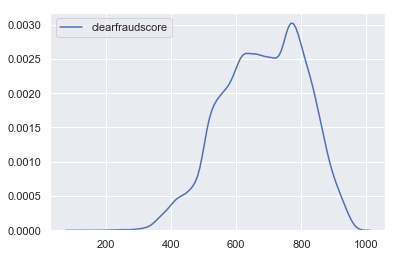

In [44]:
# kdeplot of the clear fraud score
sns.kdeplot(data=clarity['clearfraudscore'])

We can see that the data is distributed relatively evenly about a mean of ~700. As the clearfraudscore data is quite well distributed we will remove the columns of categorical and boolean data that is highly imbalanced (ie. if the attribute is boolean and more than 80% of the data is False). 

The reasoning behind this is that if the attribute is highly imbalanced and does not contain many unique values, the attribute does not hold much meaningful information and can therefore be dropped to simplify data analysis

In [45]:
for col in clarity.select_dtypes(['object','bool']).loc[:,clarity.select_dtypes(['object','bool']).columns!='underwritingid']:
    if clarity[col].value_counts().max() > 0.8*clarity[col].value_counts().sum():
        clarity.drop(col, axis=1, inplace=True)

Now, let's parse the clearfraudinquiry columns. These columns specify the number of inquiries from one minute ago to 365 days. Realistically, we only need one of these time-based columns as including more than that would be redundant. However, we want to choose the column that retains the most information while at the same time being defined enough to form some correlations. Hence, we will plot a correlation heatmap, scatter plot and kde plot to determine which column to keep.

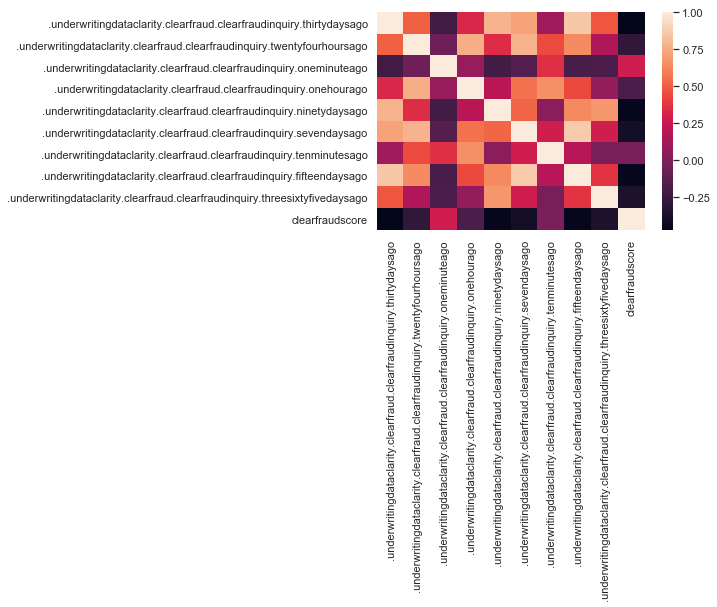

In [46]:
sns.heatmap(clarity[clarity.columns[:9]].merge(clarity[clarity.columns[-2]], left_index=True, right_index=True).corr())


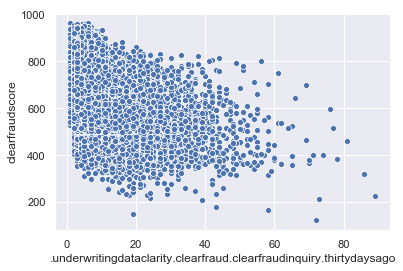

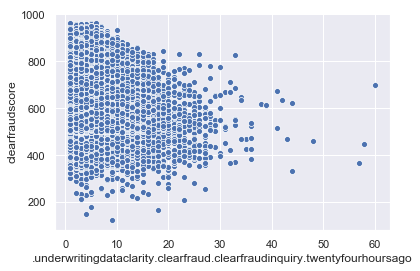

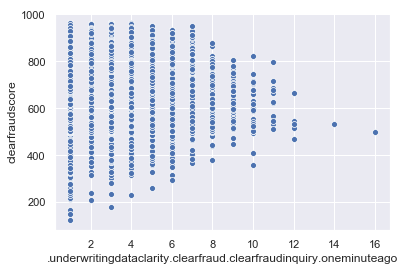

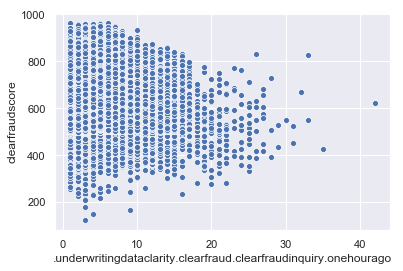

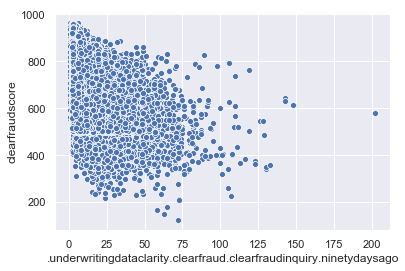

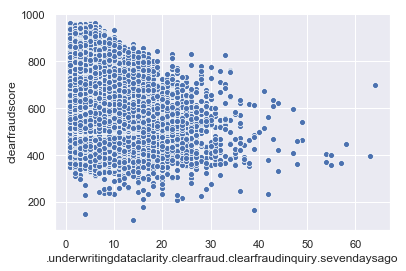

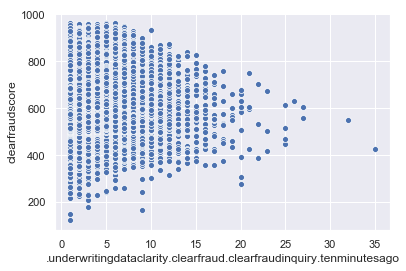

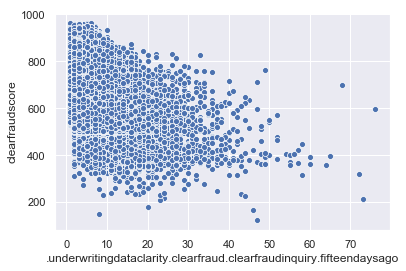

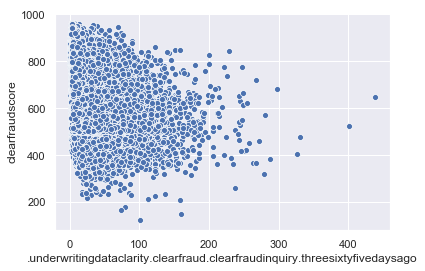

In [47]:
for i in range(9):
    plt.figure()
    sns.scatterplot(x=clarity[clarity.columns[i]],y=clarity['clearfraudscore'])

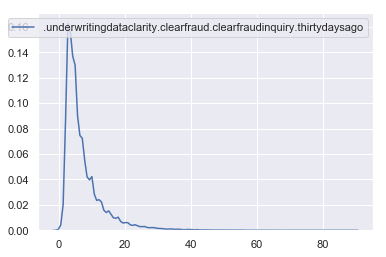

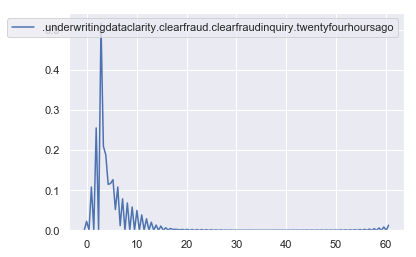

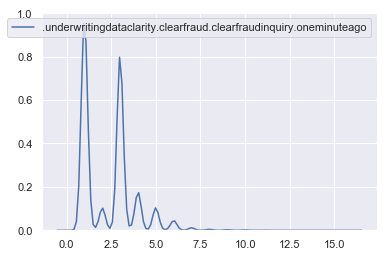

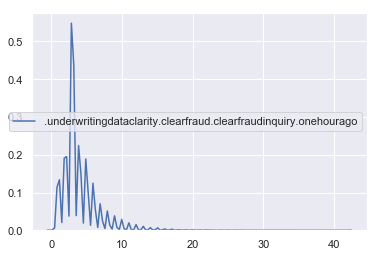

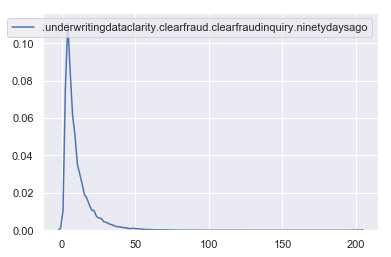

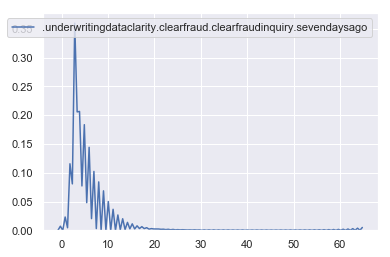

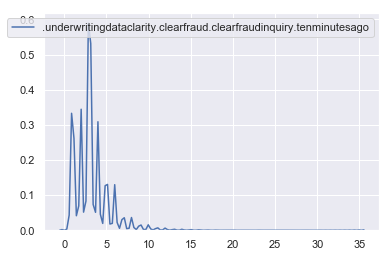

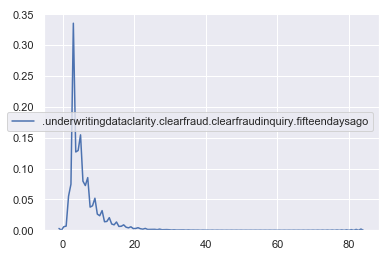

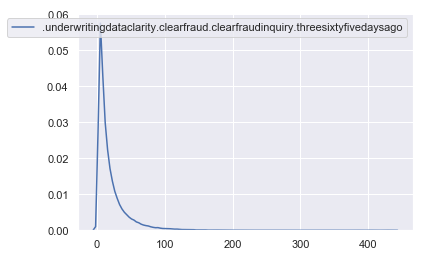

In [48]:
#Create kde plots
for i in range(9):
    plt.figure()
    sns.kdeplot(data=clarity[clarity.columns[i]])

As expected, the longer durations have a more defined correlation as they cover a larger timeframe. Normally choosing too long a time frame might result in more noise in the data but the plots show there isnt much difference between 30-90-365 days. For the purpose of this task, we will choose 30 days as it forms a good middle ground and makes sense with the timelines of a loan application.

In [49]:
# remove the columns that we don't want
for i in range(8):
    clarity.drop(clarity.columns[1], axis=1, inplace=True)

In [50]:
clarity.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,False,2.0,1.0,partial,partial,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,True,3.0,1.0,mismatch,partial,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,False,3.0,2.0,match,match,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,False,1.0,1.0,mismatch,partial,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,False,1.0,1.0,match,match,match,1.0,768.0,54cc1d67e4b0ba763e445b45


Finally we set the underwriting id to be the index

In [52]:
clarity.set_index('underwritingid', drop=True, inplace=True)

### 2.4 Joining the datasets <a class="anchor" id="join"></a>

The final step of the data cleaning is to join the dataframes together. The loan and payment dataframes will be inner joined as I will start by only looking at loan applications that have a payment history attached to it, since modelling loan risks for applications which don't have a payment history is not viable. 

Then, the underwriting reports will be left joined with the loan-payment dataframe as we want to retain all the loans that have payments while also adding in the underwriting score for these loans. There would be little purpose in retaining loan applications that have underwriting reports but no payment history as effectively the loan risk would simply be the clear fraud score.

In [53]:
loan_payment = pd.merge(loan, payment_g, left_index=True, right_index=True, how='inner')

In [54]:
loan_payment_clarity = pd.merge(loan_payment, clarity, left_on='clarityFraudId', right_index=True,how='left')

In [55]:
loan_payment_clarity.head()

,payFrequency,apr,applicationDate,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,hasACollectionPayment,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
loanId,,,,,,,,,,,,,,,,,,,,,
LL-I-06644937,B,199.0,2016-01-19 22:07:36.778,True,0.0,True,1,Paid Off Loan,3000.0,6395.19,...,False,3.0,False,0.0,1.0,match,partial,invalid,5.0,879.0
LL-I-12263369,B,475.0,2016-11-28 19:54:22.982,True,2.0,True,1,New Loan,350.0,893.88,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LL-I-17826953,W,645.0,2017-03-01 15:55:41.823,True,0.0,True,1,New Loan,400.0,1364.87,...,False,3.0,True,5.0,1.0,match,match,match,1.0,658.0
LL-I-16519347,S,490.0,2017-01-31 17:48:17.381,True,2.0,True,1,Paid Off Loan,1250.0,3313.78,...,False,4.0,False,1.0,2.0,partial,partial,match,6.0,835.0
LL-I-11506719,B,590.0,2016-08-27 09:08:05.442,True,0.0,True,1,Paid Off Loan,800.0,2432.08,...,False,13.0,False,2.0,1.0,match,match,match,1.0,624.0


In [56]:
for col in loan.select_dtypes(['object','bool']).columns:
    print(loan_payment_clarity[col].value_counts())

B    23362
W    10536
M     2950
S     2667
I      437
Name: payFrequency, dtype: int64
True     39928
False       24
Name: originated, dtype: int64
True     39930
False       22
Name: approved, dtype: int64
Paid Off Loan                  11425
External Collection            11334
New Loan                        8028
Internal Collection             5552
Returned Item                   1177
Settlement Paid Off              708
Credit Return Void               699
Customer Voided New Loan         336
Settled Bankruptcy               325
Pending Paid Off                 168
Charged Off Paid Off             159
CSR Voided New Loan               27
Withdrawn Application              5
Pending Rescind                    4
Voided New Loan                    2
Charged Off                        1
Settlement Pending Paid Off        1
Customver Voided New Loan          1
Name: loanStatus, dtype: int64
OH    6691
IL    5290
TX    3156
WI    2639
MO    2193
FL    1842
MI    1752
IN    1738
CA    1

In [57]:
for col in clarity.select_dtypes(['object','bool']).columns:
    print(loan_payment_clarity[col].value_counts())

False    24462
True      7816
Name: .underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict, dtype: int64
match          12163
mismatch       11660
unavailable     4118
partial         3624
invalid          721
Name: .underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch, dtype: int64
partial     22658
match        9392
other         173
mismatch       63
Name: .underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult, dtype: int64
match          25838
partial         4485
invalid         1573
mismatch         324
unavailable       66
Name: .underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch, dtype: int64


Based on the unique value counts for the new loan-payment-clarity dataframe, the columns with heavily imbalanced data and very few unique values are dropped. isFunded is dropped as we can determine this from the payment information and is thus redundant.

In [58]:
loan_payment_clarity.drop(['isFunded','originated','approved'], axis = 1, inplace=True)

Calculate the loan quality by dividing the total payment received by the original scheduled amount.

In [59]:
loan_payment_clarity['ratioOfScheduledAmountRepaid'] = loan_payment_clarity['totalPaymentReceived']/loan_payment_clarity['originallyScheduledPaymentAmount']

Finally, drop outliers

In [60]:
loan_payment_clarity = loan_payment_clarity[loan_payment_clarity['ratioOfScheduledAmountRepaid'] < 1.5]

## 3. Exploratory Data Analysis <a class="anchor" id="eda"></a>
After cleaning each of the datasets and joining them together, we can now do a deeper dive into the data to find any interesting relationships between the data, as well as establishing the metric for loan quality to be used

In [61]:
loan_payment_clarity.head()

,payFrequency,apr,applicationDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,...,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,ratioOfScheduledAmountRepaid
loanId,,,,,,,,,,,,,,,,,,,,,
LL-I-06644937,B,199.0,2016-01-19 22:07:36.778,0.0,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,...,3.0,False,0.0,1.0,match,partial,invalid,5.0,879.0,0.983095
LL-I-12263369,B,475.0,2016-11-28 19:54:22.982,2.0,New Loan,350.0,893.88,MO,organic,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.538540
LL-I-17826953,W,645.0,2017-03-01 15:55:41.823,0.0,New Loan,400.0,1364.87,NJ,lead,40,...,3.0,True,5.0,1.0,match,match,match,1.0,658.0,0.000000
LL-I-16519347,S,490.0,2017-01-31 17:48:17.381,2.0,Paid Off Loan,1250.0,3313.78,MO,organic,0,...,4.0,False,1.0,2.0,partial,partial,match,6.0,835.0,0.402486
LL-I-11506719,B,590.0,2016-08-27 09:08:05.442,0.0,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,...,13.0,False,2.0,1.0,match,match,match,1.0,624.0,1.000000


In [62]:
loan_payment_clarity.columns

Index(['payFrequency', 'apr', 'applicationDate', 'nPaidOff', 'loanStatus',
       'loanAmount', 'originallyScheduledPaymentAmount', 'state', 'leadType',
       'leadCost', 'clarityFraudId', 'hasCF', 'numberOfInstallmentsChecked',
       'numberOfInstallmentsNotChecked', 'totalPaymentReceived',
       'totalPaymentNotReceived', 'totalPrincipalPaidOff',
       'moreThan90DaysOverdue', 'hasACollectionPayment',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount',
       '.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch',
       '.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult',
       '.underwritingdat

Taken from our hypothesis list earlier:

1. Regarding the loans dataset
    - What is the distribution for the loan amounts and does it affect the quality of a loan?
    - Which type of loans perform the best/has the best repayment?
    - Which states account for the higher performing loans?
2. Regarding the payments dataset
    - How many loans have payments which did not go through?
    - Does payment amount affect their ability to pay off the loan?
    - Does a loan with a collection payment perform better or worse?
3. Regarding clarity dataset
    - How does clear fraud score reflect the ability of a given loan to be successfully repaid?
    - Which of the other fields in the clarity report affect the repayability of a loan if any?

Let's first take a look at the distribution of the loan repayability to get an idea of the data we are trying to model

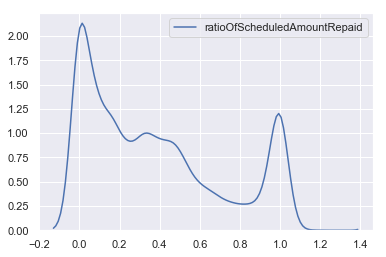

In [63]:
sns.kdeplot(data=loan_payment_clarity['ratioOfScheduledAmountRepaid'])

The distribution sees spikes at the loan being fully repaid(1) and not being repaid at all(0) with intermediate values being few and far between. This means a given applicant is more likely to either fully repay the loan or not repay at all rather than partially repay.

### 3.1 Loan Exploratory Data Analysis<a class="anchor" id="leda"></a>
#### 3.1.1 Loan Amount/Originally Scheduled Amount<a class="anchor" id="loanAmount"></a>

Intuitively, loan amount reflects the risk MoneyLion undertakes for a given loan and should affect the ability of an applicant to repay the loan. I will do a regression plot to see if there is any noticeable correlation. 

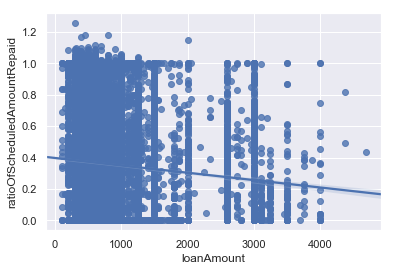

In [64]:
sns.regplot(x=loan_payment_clarity.loanAmount, y=loan_payment_clarity.ratioOfScheduledAmountRepaid, robust=True)

The reg plot shows there is a minimal correlation but nothing really defined. 

Maybe a plot of the originallyScheduledAmount might be more insightful.

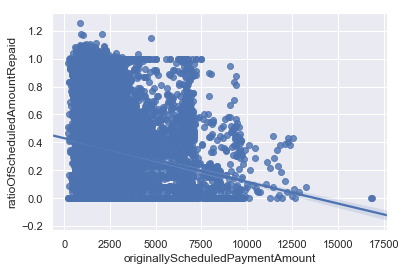

In [65]:
sns.regplot(x=loan_payment_clarity.originallyScheduledPaymentAmount, y=loan_payment_clarity.ratioOfScheduledAmountRepaid)

As expected, there is a more defined correlation. However, the data is tail-heavy so the error does increase as originallyScheduledPaymentAmount increases.

Let's try binning the loan amounts and get the mean of their loan repayability to see if we can get a better representation.

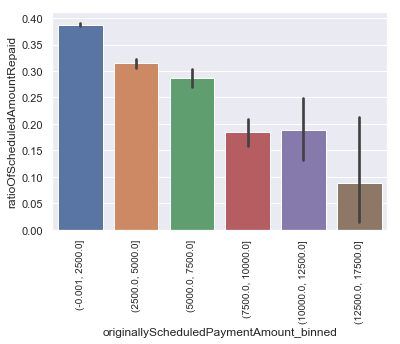

In [66]:
df = loan_payment_clarity.copy()
df['originallyScheduledPaymentAmount_binned'] = pd.cut(loan_payment_clarity['originallyScheduledPaymentAmount'], bins=[0, 2500, 5000, 7500,10000,12500,17500], include_lowest=True)
# out = pd.cut(loan_payment_clarity['apr'], bins=[0, 100, 200, 300,400,500,600,700,800], include_lowest=True)
# ax = df['binned'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))

ax = sns.barplot(x='originallyScheduledPaymentAmount_binned', y='ratioOfScheduledAmountRepaid', data= df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10);
plt.show()

Here we can get a clearer picture of the relationship and confirms our initial hypothesis. As the payment amount increases the repayability of the loan decreases. The error is higher for higher originally scheduled payment amount values as the data is imbalanced.

Let's perform a similar operation for the number of applications with overdue payments to see if it has similar results

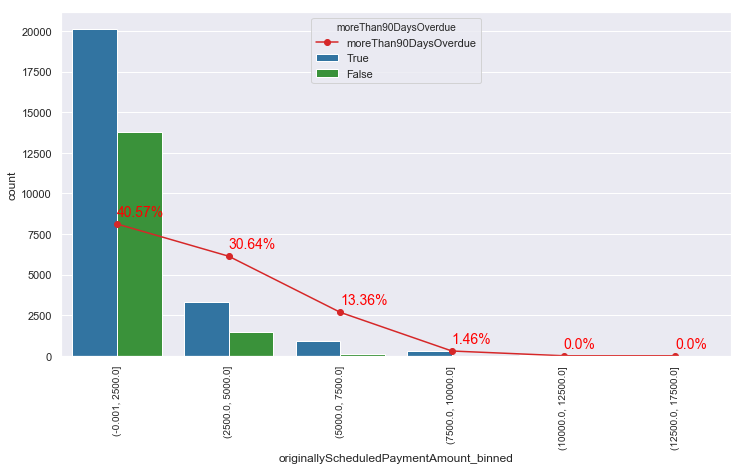

In [67]:
fig1, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig1.subplots_adjust(top=0.92)

df = loan_payment_clarity.copy()
df['originallyScheduledPaymentAmount_binned'] = pd.cut(loan_payment_clarity['originallyScheduledPaymentAmount'], bins=[0, 2500, 5000, 7500,10000,12500,17500], include_lowest=True)
# out = pd.cut(loan_payment_clarity['apr'], bins=[0, 100, 200, 300,400,500,600,700,800], include_lowest=True)
# ax = df['binned'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
scheduledPaymentOverdue = df.groupby('originallyScheduledPaymentAmount_binned')['moreThan90DaysOverdue'].apply(lambda x:1-(x.sum()/x.count()))
(scheduledPaymentOverdue*20000).plot(x='originallyScheduledPaymentAmount_binned', linestyle='-', marker='o', ax=ax, color='tab:red')

#Setting the line chart marker labels
x = ax.get_xticks()  #Getting the x-axis ticks to plot the label
for a,b,c in zip(x,scheduledPaymentOverdue.values*20000, scheduledPaymentOverdue.values):
    plt.text(a,b+500,str(round(c*100,2))+'%', color='red', fontsize=14)

ax = sns.countplot(x='originallyScheduledPaymentAmount_binned', data=df,hue='moreThan90DaysOverdue',palette=['tab:blue','tab:green'], hue_order=[True, False])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10);
plt.show()

Following the analysis of the ratio of originally schedued amount ot be repaid, the number of overdue loans also follows a similar trend in that the number of loans that are paid off on time decreases as the payment amount increases. Therefore, the originally scheduled payment amount is a good indicator of the loan performance at the initial stage (not being paid off on time)

#### 3.1.2 nPaidOff <a class="anchor" id="nPaidOff"></a>
Moving on, we can also say that the number of previous loans paid off by the applicant should influence the repayability of a loan. Let's do a similar regplot with a jitter for the discrete variable to investigate this.

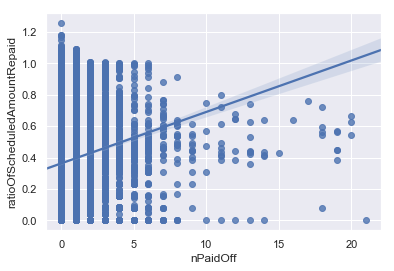

In [68]:
# sns.scatterplot(x=loan_payment_clarity.nPaidOff, y=loan_payment_clarity.ratioOfScheduledAmountRepaid)
sns.regplot(x=loan_payment_clarity.nPaidOff, y=loan_payment_clarity.ratioOfScheduledAmountRepaid)

Similar to originallyScheduledPaymentAmount, there is a good correlation but it is tail-heavy.

Let's take a look at the distributon of the number of loans that have overdue payments based on nPaidOff.

No handles with labels found to put in legend.


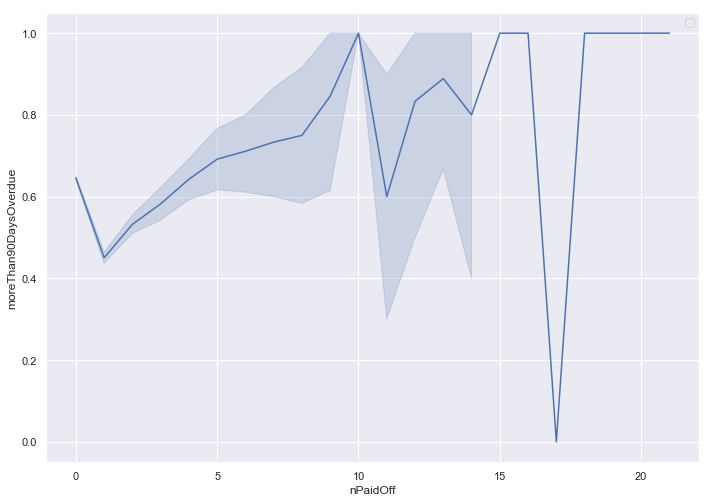

In [69]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x='nPaidOff', y='moreThan90DaysOverdue', data=loan_payment_clarity)
# sns.distplot(loan_payment_clarity[~loan_payment_clarity['moreThan90DaysOverdue']].nPaidOff.dropna(), label='Paid On Time', kde=False)
ax.legend()

Interestingly,  applicants with more than 1 previously paid off loan, seemed more likely to make late payments. This could be attributed to the lower sample size for higher n (as reflected by the error lines on the graph) but let's investigate these anomalies further by plotting for originally scheduled payment amount as well.

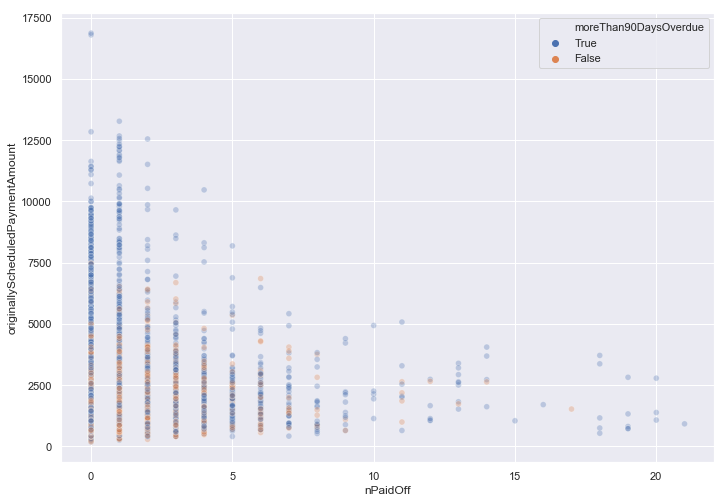

In [70]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='nPaidOff', y='originallyScheduledPaymentAmount', data=loan_payment_clarity, hue='moreThan90DaysOverdue', alpha=0.3, hue_order=[True, False])

We initially hypothesize that the more previously paid off loans for an applicant, the more likely they are to repay on time. However, the data shows that they are more likely to be late on their payments. This doesn't necessarily mean they will repay less just that they are more tardy. We've already seen a positive correlation of nPaidOff with the ratio of the originally scheduled amount to be repaid so this behaviour could be due to a more experienced borrower taking their time to pay off their loans because they are more familiar with repayment and are therefore more lax about repaying. More borrowers making late repayments is not favourable for MoneyLion and this should be investigated further by the company.

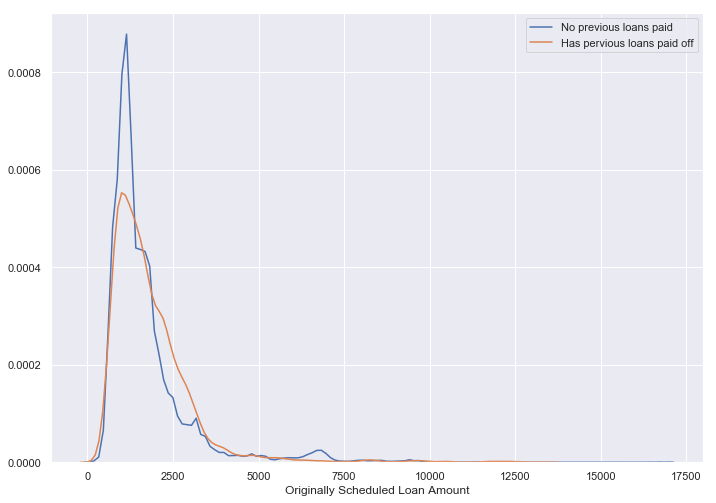

In [71]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(loan_payment_clarity[loan_payment_clarity['nPaidOff']==0].originallyScheduledPaymentAmount, label="No previous loans paid")
sns.kdeplot(loan_payment_clarity[loan_payment_clarity['nPaidOff']!=0].originallyScheduledPaymentAmount, label="Has pervious loans paid off")
ax.set(xlabel='Originally Scheduled Loan Amount');

We can see that more applicants with no previous successful loan history were funded for lower originally scheduled loan amounts. This difference might be the reason why there is a sharp decrease in overdue payments from 0 nPaidOff to 1 nPaidOff.

#### 3.1.3 payFrequency <a class="anchor" id="payFrequency"></a>
Now let's investigate the plan of payment frequency and identify the best/worst performing loans based on their payment frequency, if any.

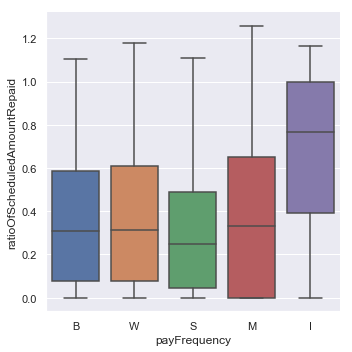

In [72]:
sns.catplot(x="payFrequency", y="ratioOfScheduledAmountRepaid", kind="box", data=loan_payment_clarity);

Here, we see there is a clear win for irregular payments. (Makes sense as people who have more freedom in deciding when to repay their loans will be more able). However, there might be some discrepancies in the data. Let's take a deeper dive into payFrequency for loans with overdue payments

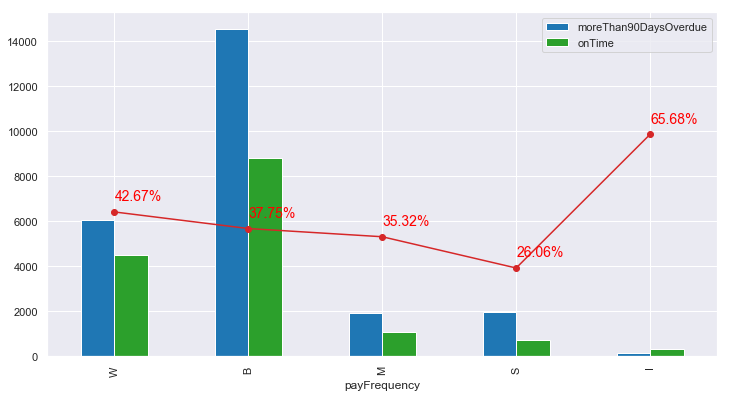

In [73]:
fig1, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig1.subplots_adjust(top=0.92)
orderList=['W','B','M','S','I']

## Plotting the line chart:
payFrequencyOverdue = loan_payment_clarity.groupby('payFrequency')['moreThan90DaysOverdue'].apply(lambda x:1-(x.sum()/x.count()))
(payFrequencyOverdue.reindex(orderList)*15000).plot(x='payFrequency', linestyle='-', marker='o', ax=ax, color='tab:red')

#Setting the line chart marker labels
x = ax.get_xticks()  #Getting the x-axis ticks to plot the label
for a,b,c in zip(x,payFrequencyOverdue.reindex(orderList).values*15000, payFrequencyOverdue.reindex(orderList).values):
    plt.text(2*a,b+500,str(round(c*100,2))+'%', color='red', fontsize=14)

## Plot bar chart
df1 = loan_payment_clarity.groupby('payFrequency')['moreThan90DaysOverdue'].sum()
df2 = loan_payment_clarity.groupby('payFrequency')['moreThan90DaysOverdue'].apply(lambda x:x.count()-x.sum())
df3 = pd.concat([df1, df2.rename('onTime')], axis=1)


df3.reindex(orderList).plot(kind='bar', ax=ax, color=['tab:blue','tab:green'])
# sns.countplot(x='payFrequency',data=loan_payment_clarity)

First off, eventhough irregular payments perform the best they are by far the minority class in the data. Moreover, we can see a trend in that the longer the interval between payments, the less likely the applicant will pay on time. This can be chalked up due to ignorance of the borrower but it reflects the risk in funding loans with a longer payment intervals.

At a 95% Confidence Interval and a 5% margin of error and assuming a total population size of 1000000, the minimum sample size needed is 384. Irregular payments have a total sample size of 437 in the data so we can say that despite being in the minority of the data it is reflective of the population at a 95% confidence.

In [74]:
loan_payment_clarity.groupby('payFrequency')['moreThan90DaysOverdue'].count()

payFrequency
B    23360
I      437
M     2950
S     2667
W    10536
Name: moreThan90DaysOverdue, dtype: int64

#### 3.1.4 State<a class="anchor" id="state"></a>
Let's now look at the distribution of the loan repayability relative to the different states. The states are sorted in the order of count so states with more values are represented first

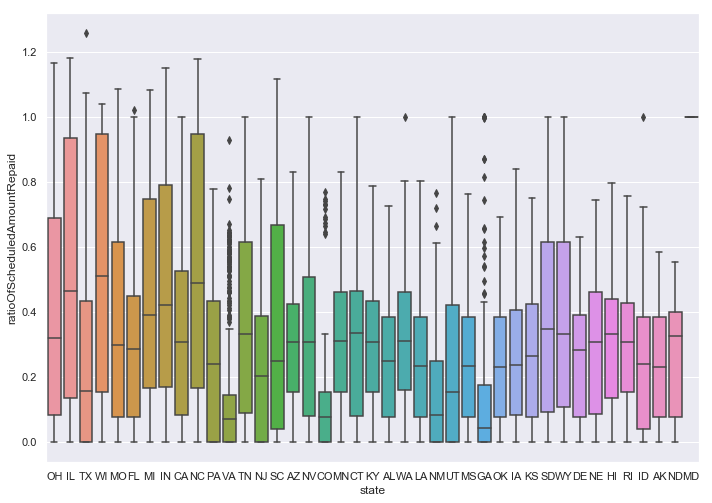

In [75]:
fig, ax = plt.subplots(figsize=a4_dims)

# Sort the state values by count
state_labels = loan_payment_clarity.groupby('state').ratioOfScheduledAmountRepaid.count().sort_values(ascending=False).keys().values

loan_payment_clarity['state'] = pd.Categorical(loan_payment_clarity['state'], categories = state_labels , ordered = True)
sns.boxplot(x="state", y="ratioOfScheduledAmountRepaid", data=loan_payment_clarity, ax=ax);

The key note here is that there are some definite differences in the distribution of loan repayability in different states. Let's take a deeper dive by looking at the proportion of late payments for each of the different states to see if it corroborates with our findings above.

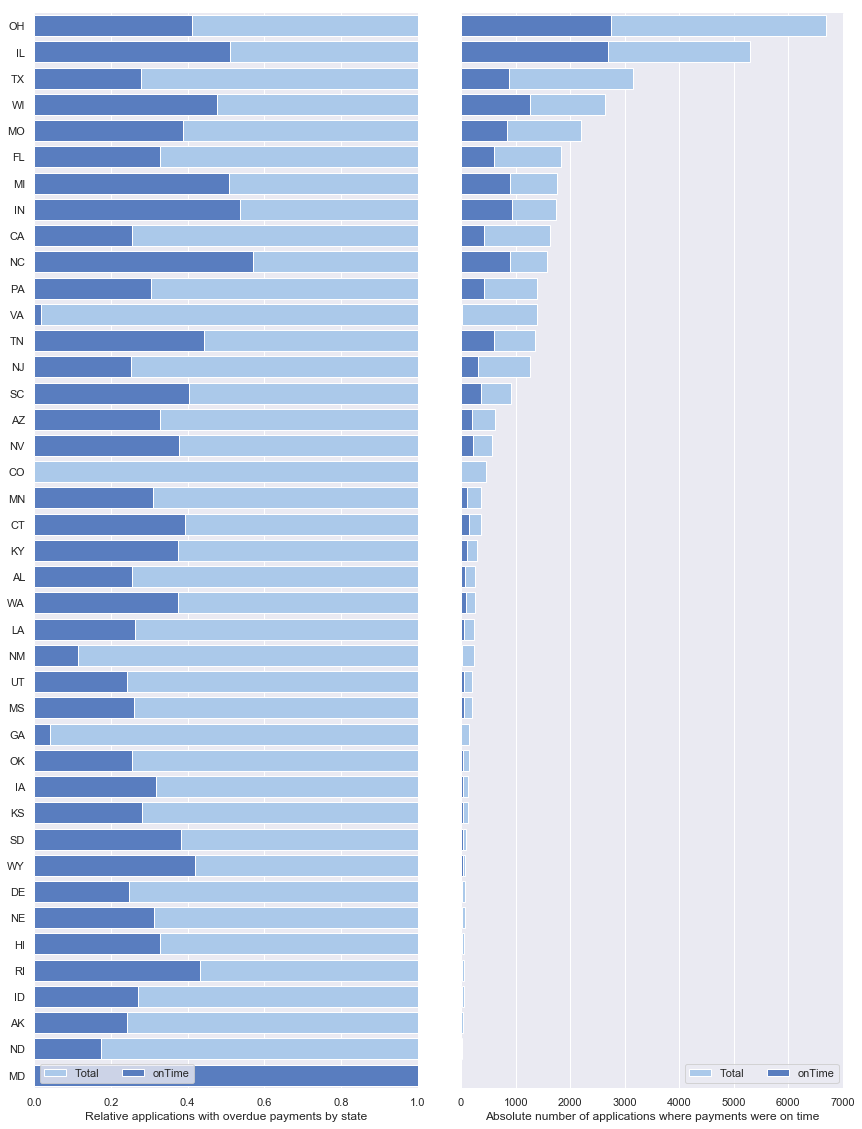

In [76]:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,16), sharey=False)
fig2.tight_layout()  #When working with 'tight_layout', the subplot must be adjusted [https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot]
fig2.subplots_adjust(top=0.96)  #Adjusting the space for the superior title

df1 = pd.DataFrame(loan_payment_clarity.groupby('state')['moreThan90DaysOverdue'].apply(lambda x:1-(x.sum()/x.count())).rename('onTime'))
df1['total'] = 1

#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="total", y=df1.index, data=df1, label="Total", color="b", ax=ax1)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x="onTime", y=df1.index, data=df1, label="onTime", color="b", ax=ax1)

ax1.legend(ncol=2, loc="lower left", frameon=True)
ax1.set(xlim=(0, 1), ylabel="", xlabel="Relative applications with overdue payments by state")
sns.despine(left=True, bottom=True,ax=ax1)

df1 = loan_payment_clarity.groupby('state')['moreThan90DaysOverdue'].sum()
df2 = loan_payment_clarity.groupby('state')['moreThan90DaysOverdue'].apply(lambda x:x.count()-x.sum())
df3 = pd.concat([df1, df2.rename('onTime')], axis=1)
df3['total'] = df3.sum(axis=1)

## Plot the absolute absence by neighborhood
#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="total", y=df3.index, data=df3, label="Total", color="b",ax=ax2)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x="onTime", y=df3.index, data=df3, label="onTime", color="b", ax=ax2)
## Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(ylabel="", xlabel="Absolute number of applications where payments were on time")
ax2.set_yticklabels([''])
sns.despine(left=True, bottom=True, ax=ax2)


Visually, we can confirm that loan payments are on time roughly 40% of the time with significant standard deviation between states. The absolute graph on the right is displayed to avoid biased interpretations. This data can help the company determine which states' loans are performing well or being repaid on time.

#### 3.1.5 Application Date<a class="anchor" id="date"></a>
Moving on, the data also has a time domain in the form of the application date and payment dates. We will analyse the loan performance based on its' application date as payment dates come in multiples and are difficult to aggregate for the purpose of visualisation. Although approval date would be more reflective, application date is used to visualise the time-series data.

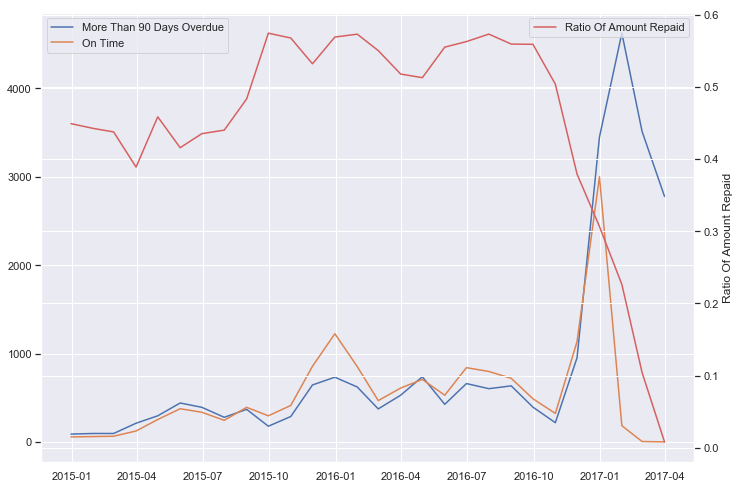

In [77]:
fig, ax = plt.subplots(figsize=(a4_dims))
sns.lineplot(data=loan_payment_clarity.groupby(pd.Grouper(key='applicationDate', freq='M')).moreThan90DaysOverdue.sum(), ax=ax, label='More Than 90 Days Overdue')
sns.lineplot(data=loan_payment_clarity.groupby(pd.Grouper(key='applicationDate', freq='M')).moreThan90DaysOverdue.apply(lambda x:x.count()-x.sum()), ax=ax, label='On Time')
ax1.set(ylabel="count")
ax2 = ax.twinx()
ax2.set(ylabel="Ratio Of Amount Repaid")
sns.lineplot(data=loan_payment_clarity.groupby(pd.Grouper(key='applicationDate', freq='M')).ratioOfScheduledAmountRepaid.mean(), ax=ax2, label='Ratio Of Amount Repaid',color="r")

From the plots, there is no clear indication of seasonality or a pattern. There is a sudden spike on January 2017 in number of loans funded and subsequently a fall in the amount repaid corresponding to the number of overdue loans also skyrocketing. This may be due to an influx of clients after a round of marketing or the company receiving funding to fund more loans. However for the purpose of modelling the loan repayability, temporal data does not provide much insight.

#### 3.1.6 leadCost/leadType<a class="anchor" id="lead"></a>
Finally, let's look at lead cost and lead type against the loan repayability

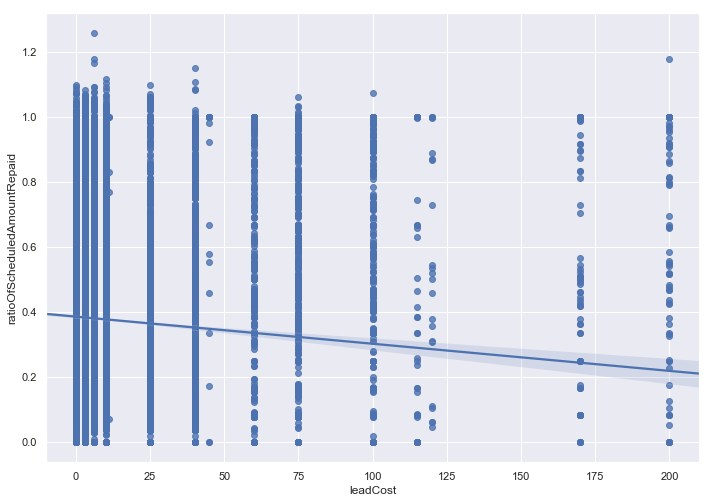

In [78]:
fig, ax = plt.subplots(figsize=a4_dims)
# sns.kdeplot(data=loan_payment_clarity[loan_payment_clarity.moreThan90DaysOverdue].leadCost.rename('moreThan90DaysOverdue'), ax=ax)
# sns.kdeplot(data=loan_payment_clarity[~loan_payment_clarity.moreThan90DaysOverdue].leadCost.rename('onTime'), ax=ax)
sns.regplot(x='leadCost', y='ratioOfScheduledAmountRepaid', data=loan_payment_clarity)

There is little correlation from the lead cost regression plot with high error at larger lead cost values. Thus, it is difficult to intepret meaningful relationships for lead cost. Perhaps lead type will provide a better insight

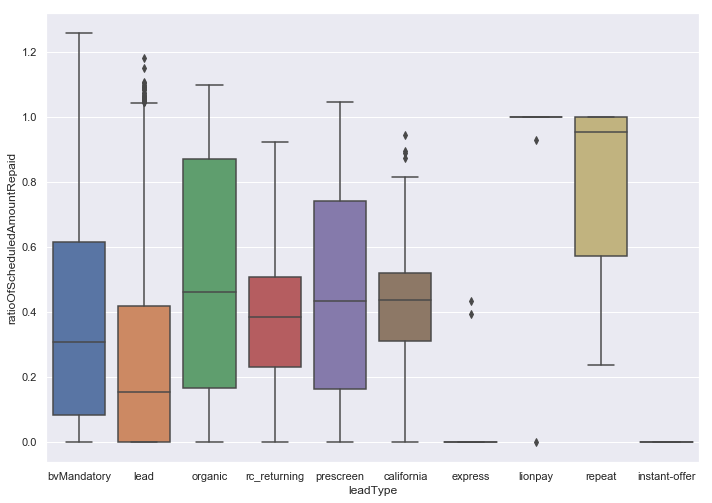

In [79]:
fig, ax = plt.subplots(figsize=a4_dims)

df = loan_payment_clarity.copy()

# Sort the state values by count
lead_labels = df.groupby('leadType').ratioOfScheduledAmountRepaid.count().sort_values(ascending=False).keys().values

df['leadType'] = pd.Categorical(df['leadType'], categories = lead_labels , ordered = True)

sns.boxplot(x='leadType', y='ratioOfScheduledAmountRepaid', data=df)

Here lead type shows a more distinct relationship. However some of the leatypes are poorly represented with only a few values in the data. THey can therefore be aggregated into an 'others' column

bvMandatory      16873
lead             12118
organic           7675
rc_returning      1846
prescreen         1345
california          49
express             16
lionpay             11
repeat               9
instant-offer        8
Name: leadType, dtype: int64


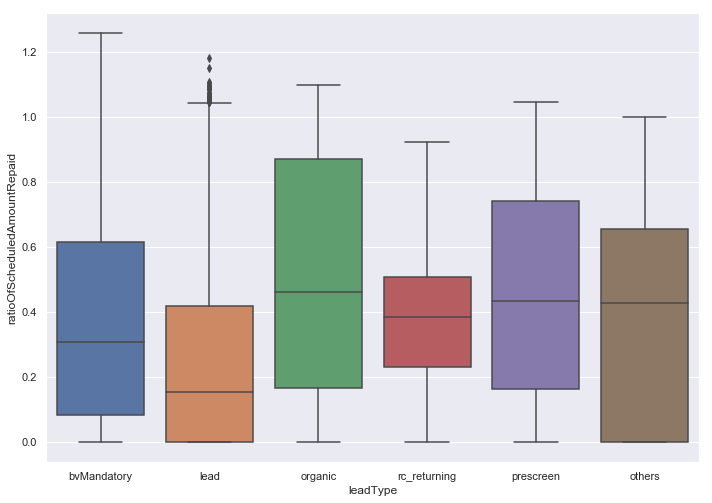

In [80]:
# aggregate the lead types with fewer than 100 entries into 'others' column
print(loan_payment_clarity['leadType'].value_counts())
loan_payment_clarity.loc[loan_payment_clarity['leadType'].isin(loan_payment_clarity['leadType'].value_counts()[loan_payment_clarity['leadType'].value_counts() <100].index),'leadType'] = 'others'

# Replot the box plot
fig, ax = plt.subplots(figsize=a4_dims)

df = loan_payment_clarity.copy()

# Sort the state values by count
lead_labels = df.groupby('leadType').ratioOfScheduledAmountRepaid.count().sort_values(ascending=False).keys().values

df['leadType'] = pd.Categorical(df['leadType'], categories = lead_labels , ordered = True)

sns.boxplot(x='leadType', y='ratioOfScheduledAmountRepaid', data=df)

### 3.2 Clarity Fraud Report Exploratory Data Analysis <a class="anchor" id="ceda"></a>

Our initial guess would be that clear fraud score is a good indication for loan repayability. Let's investigate this.

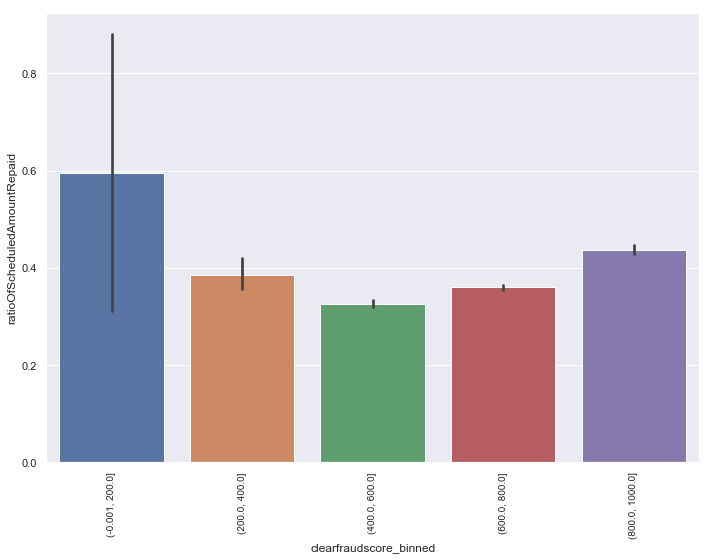

In [81]:
fig, ax = plt.subplots(figsize=(a4_dims))
df = loan_payment_clarity.copy()
df['clearfraudscore_binned'] = pd.cut(loan_payment_clarity['clearfraudscore'], bins=[0, 200, 400, 600,800,1000], include_lowest=True)
# out = pd.cut(loan_payment_clarity['apr'], bins=[0, 100, 200, 300,400,500,600,700,800], include_lowest=True)
# ax = df['binned'].value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))

ax = sns.barplot(x='clearfraudscore_binned', y='ratioOfScheduledAmountRepaid', data= df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10);
plt.show()
# sns.scatterplot(x='clearfraudscore',y='ratioOfScheduledAmountRepaid',data=loan_payment_clarity)

There is a steady increase in loan repayability from clear fraud scores of 400 to 1000. The higher values of loan repayability for the lower clear fraud scores could be due to bias as there is not much data for those bins but we will investigate further.

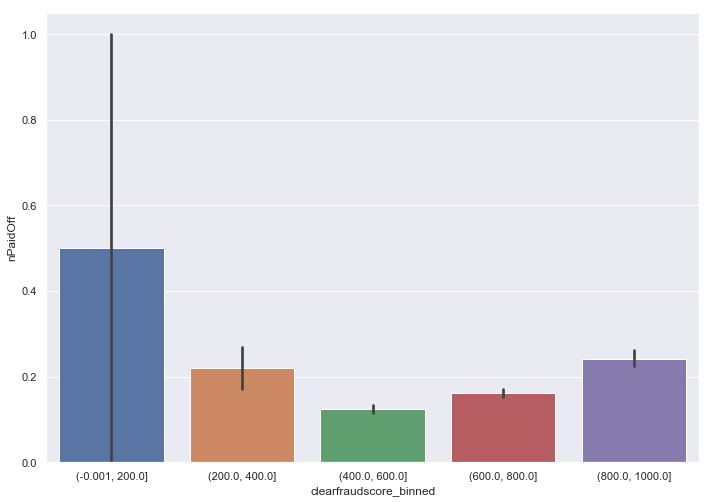

In [82]:
#TODO Investigate why there is an increase for 200-400 bin
fig, ax = plt.subplots(figsize=(a4_dims))
sns.barplot(x='clearfraudscore_binned',y='nPaidOff', data=df)

We can see that the mean of number of previously paid off loans is higher for the 200-400 bin of clearfraudscore. This might be the reason why it records a higher loan repayability despite having a lower clear fraud score. This does indicate that nPaidOff does have a stronger correlation to loan repayability than clear fraud score.

C:\Users\User\Miniconda3\envs\ml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Miniconda3\envs\ml\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


[Text(0.5, 0, 'Clear Fraud Score')]

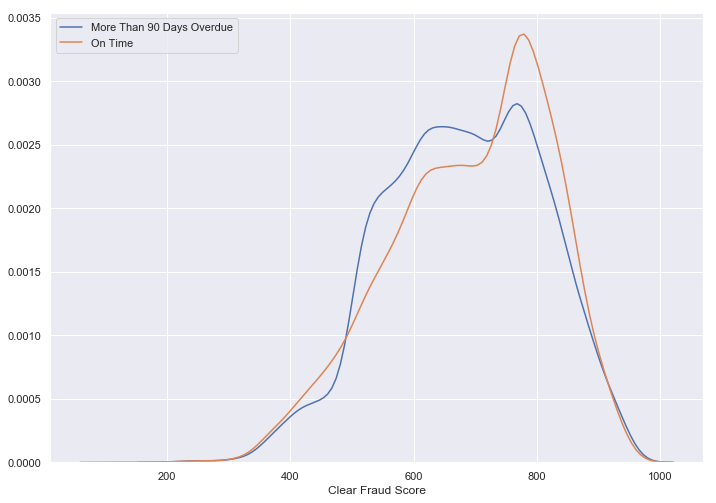

In [83]:
fig, ax = plt.subplots(figsize=(a4_dims))
sns.kdeplot(loan_payment_clarity[loan_payment_clarity['moreThan90DaysOverdue']].clearfraudscore, label='More Than 90 Days Overdue')
sns.kdeplot(loan_payment_clarity[~loan_payment_clarity['moreThan90DaysOverdue']].clearfraudscore, label = 'On Time')
ax.set(xlabel='Clear Fraud Score')

In terms of overdue payments, clear fraud score can't really differentiate between late and on time payments besides a minor difference for clear fraud scores > 800 for on time payments and <600 for overdue payments. This means that the clear fraud score is more reflective of the outcome of a loan (how much of the originally scheduled amount is repaid) than the tardiness of the applicant to make payments on time.

Let's see if any of the other fields from the clear fraud underwriting report has any significant impact on the loan repayability

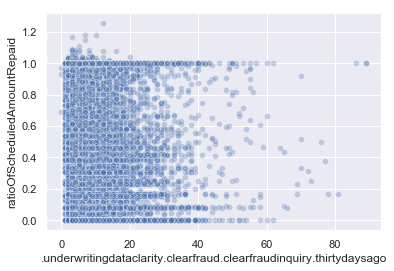

In [84]:
sns.scatterplot(x='.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago', y='ratioOfScheduledAmountRepaid', data=loan_payment_clarity, alpha=0.3)

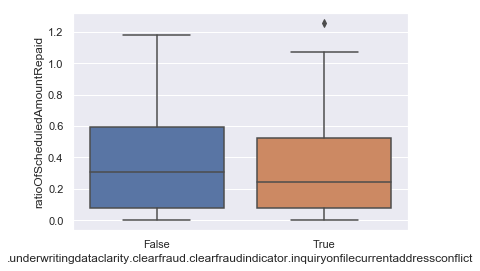

In [85]:
sns.boxplot(x='.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict', y='ratioOfScheduledAmountRepaid', data=loan_payment_clarity)

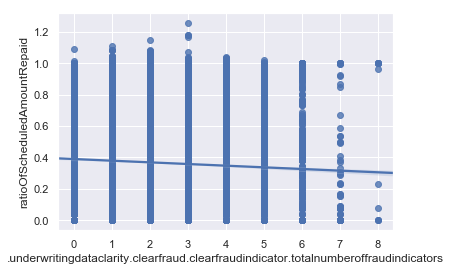

In [86]:
sns.regplot(x='.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators', y='ratioOfScheduledAmountRepaid', data=loan_payment_clarity)

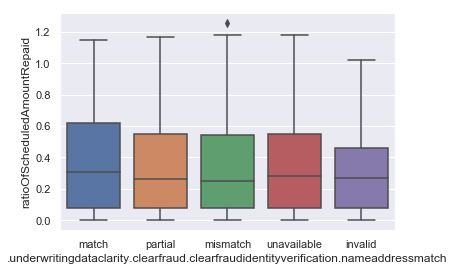

In [88]:
sns.boxplot(x='.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch', y='ratioOfScheduledAmountRepaid', data=loan_payment_clarity)

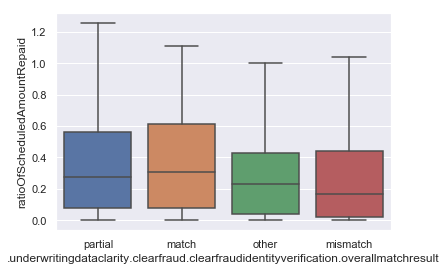

In [89]:
sns.boxplot(x='.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult', y='ratioOfScheduledAmountRepaid', data=loan_payment_clarity)

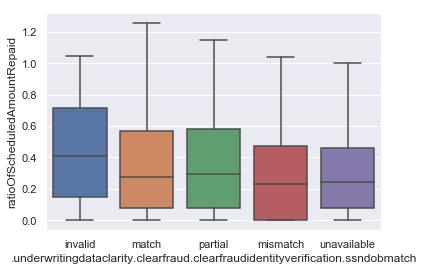

In [90]:
sns.boxplot(x='.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch', y='ratioOfScheduledAmountRepaid', data=loan_payment_clarity)

Overall, there is little to no relation of the different clear fraud report fields with the loan quality metric. The boxplots for the categorical attributes have very little variation in their distributions of loan repayability and the scatter plot results are more random.

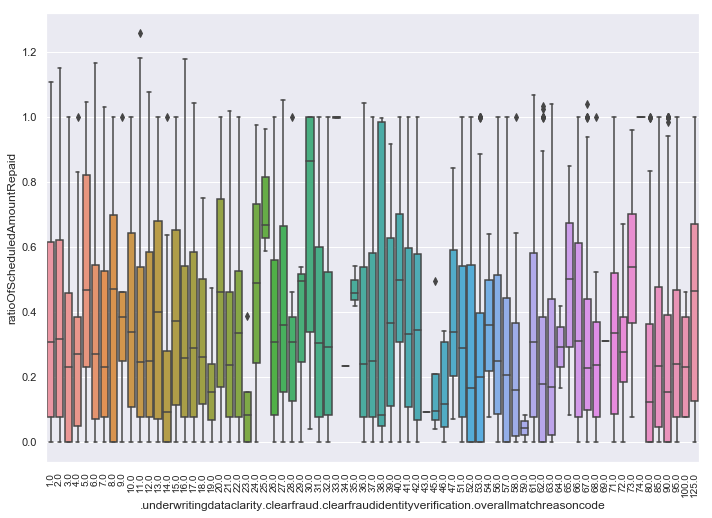

In [91]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x='.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode', y='ratioOfScheduledAmountRepaid', data=loan_payment_clarity)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10);

Match reason code however does show some distinction of loan repayability. Unfortunately I don't have the dictionary for the meaning of different codes for the match reason so it is difficult to intepret these results. They should however be treated as categorical values. Furthermore, the data is difficult to represent in a model. One hot encoding would drastically increase dimensionality and label encoding would introduce false relationships in the data. For simplicity of the modelling process, this attribute will be omitted from the model but given more data on the nature of this attribute, it could be investigaed further

## 4. Modelling<a class="anchor" id="modelling"></a>

As mentioned before, I will be modelling loan repayability based on the ratio of received payment to the originally scheduled amount. In order to begin modelling the loan repayability, we first need to determine what initial information is available for a given loan application taking into account the data cleaning process. This is listed below. 
    - payFrequency
    - apr
    - applicationDate
    - nPaidOff
    - loanAmount
    - originallyScheduledPaymentAmount
    - state
    - leadType
    - leadCost
    - clarity fraud underwriting report information
    
The fields not listed in this list have either been cleaned off (anon_ssn) or are not relevant for modelling (isApproved, loanStatus, etc.)

Based on the exploratory data analysis, I will only be using the clear fraud score from the clarity fraud underwriting report in the model as well as dropping the application date from the model. As mentioned before, not all the entries in our dataset have a corresponding clear fraud report and are not null. Fortunately since these null values are in the minority, we can impute them with either knn or MICE. For the purpose of this investigation, I will use MICE as knn involves the creation of a nxn matrix that is the size of the dataset which is time-consuming and memory intensive. I will use the originally scheduled payment amount and nPaidOff columns to interpolate the values of clearfraudscore as they show some correlation.

In [92]:
from fancyimpute import IterativeImputer
X_filled = IterativeImputer().fit_transform(loan_payment_clarity[['originallyScheduledPaymentAmount','nPaidOff','clearfraudscore']].as_matrix())

#replace the clear fraud score column with the filled clear fraud score from the imputation
loan_payment_clarity.loc[:,'nPaidOff'] = X_filled[:,1]
loan_payment_clarity.loc[:,'clearfraudscore'] = X_filled[:,2]

Using TensorFlow backend.
C:\Users\User\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [93]:
# Only select the data to be inputted into the model
data =loan_payment_clarity.copy()
data= data[['payFrequency', 'apr', 'nPaidOff','loanAmount', 'originallyScheduledPaymentAmount', 'state', 'leadType',
       'leadCost', 'clearfraudscore', 'ratioOfScheduledAmountRepaid']]

Before moving forward, I will establish the baseline model as using only the ratio of clearfraudscore (clearfraudscore/1000) to predict loan repayabilty. The goal is to train a model that performs better than the baseline.

### 4.1 Data Preprocessing<a class="anchor" id="preprocessing"></a>

The first step is to one-hot-encode the categorical values of the data.

In [94]:
one_hot_payFrequency = pd.get_dummies(data['payFrequency'])

one_hot_state = pd.get_dummies(data['state'])

one_hot_leadType = pd.get_dummies(data['leadType'])

Split the data into X and y datasets. My plan is to perform PCA on the dataset to identify features which best capture the variance of the original data while also reducing the dimensionality of the problem. Then I will use a gradient boosted regression model to model the data. Gradient boosted regression is quite robust to overfitting and performs well on both categorical and continuos variables. I must first scale the data before performing PCA.

In [95]:
X = data.drop(['ratioOfScheduledAmountRepaid'],axis=1)
y = data['ratioOfScheduledAmountRepaid']

In [96]:
# using standard scaler library to scale the X values
from sklearn.preprocessing import StandardScaler

scaled_X = X.select_dtypes(exclude=['O','category'])

scaler = StandardScaler()
scaler.fit(scaled_X)
scaled_X=scaler.transform(scaled_X)

C:\Users\User\Miniconda3\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [97]:
# recombine the one hot encoded values and the scaled X values into the X dataset
X = np.c_[scaled_X,one_hot_payFrequency.values,one_hot_state.values,one_hot_leadType.values]

Then, the data is split into a train and test set

In [98]:
# Shuffle dataset and create train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[-2.66468153e-01  7.87580074e-02  5.92730037e-01 ...  4.59140401e-03
   4.43379530e-02  5.22694762e-03]
 [-2.71426416e-01  6.03153664e-01  9.58815176e-02 ... -1.36245915e-03
   2.23284014e-02  6.01702957e-02]
 [-4.76977822e-01  4.15108692e-01 -2.76598085e-01 ...  2.37085373e-03
  -3.16100264e-02  2.89258622e-02]
 ...
 [ 1.13653196e-16  3.83607729e-16 -3.00292337e-16 ...  4.52677644e-02
   4.52677644e-02  4.52677644e-02]
 [ 0.00000000e+00 -9.71445147e-17 -4.12764849e-17 ...  3.87977264e-01
   3.87977264e-01  3.87977264e-01]
 [ 0.00000000e+00 -4.20670443e-17  2.21579602e-16 ...  1.18706103e-01
   1.18706103e-01  1.18706103e-01]]


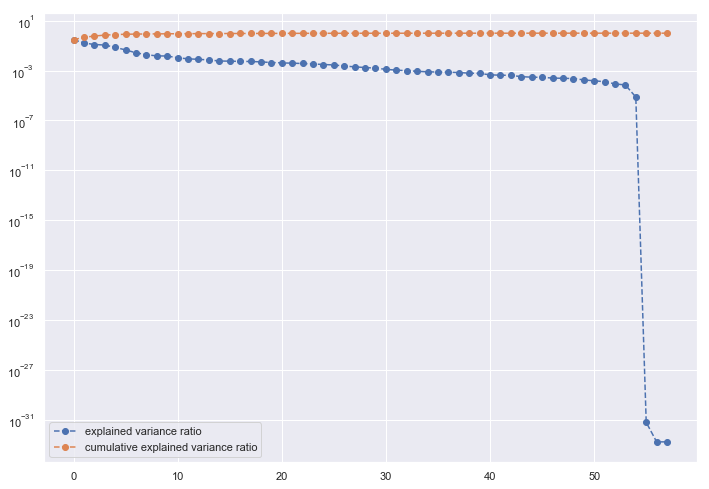

In [99]:
# Plot the number of pca components vs the explained variance to determine the number of components that best describe the problem.
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit(X_train)

fig, ax = plt.subplots(figsize=a4_dims)
plt.semilogy(pca_data.explained_variance_ratio_, '--o');
plt.semilogy(pca_data.explained_variance_ratio_.cumsum(), '--o');
plt.legend(['explained variance ratio','cumulative explained variance ratio'])
plt.xlabel='Number of Components'
print(pca_data.components_)

The graph doesn't have a favourable explained variance ratio curve but that is mostly due to the nature of having sparse categorical data in the dataset. Factor Analaysis Mixed Data Analysis might provide better components for dimensionality reduction but python doesn't have much support for it (compared to R).

However, the plots of variance ratio shows that choosing n=15 will allow us to preserve most of the original variance. PCA is performed to fit and transform the training and test datasets.

In [100]:
no_of_comp = 15

# Define function for performing pca
def perform_PCA(X_train,X_test,no_of_components):
    pca = PCA(n_components=no_of_components)  
    X_train = pca.fit_transform(X_train)  
    X_test = pca.transform(X_test)
    return X_train, X_test

perform_PCA(X_train,X_test,no_of_comp)

(array([[-1.71533751, -0.17320664, -1.02784628, ..., -0.10296362,
         -0.01702826, -0.09691957],
        [-1.61174599, -0.16103293, -1.14748359, ...,  0.5272742 ,
         -0.00202464,  0.11271763],
        [-1.47673622,  0.13235972, -0.89345218, ..., -0.04163718,
         -0.00823799, -0.37120171],
        ...,
        [-1.05592515,  0.01651154, -0.28861891, ..., -0.01364558,
         -0.06348571, -0.17106302],
        [ 0.54794481, -1.6572715 ,  0.89891954, ...,  0.04042898,
          0.64934799,  0.20248966],
        [-1.17218651, -0.18743335, -0.75782156, ..., -0.06898568,
         -0.04375432, -0.07864972]]),
 array([[-1.42315908, -0.11920871, -0.80156763, ..., -0.11367634,
          0.01211103, -0.10852164],
        [-0.85445638,  0.82336786,  0.01239796, ..., -0.09335508,
         -0.05734333, -0.1983544 ],
        [-0.19208792, -0.18895214, -0.49881432, ..., -0.67179925,
          0.10118302, -0.01298129],
        ...,
        [-1.11383796,  1.19621091,  0.59592056, ...,  

### 4.2 Model Training<a class="anchor" id="training"></a>

Use a randomized search method to find the best performing hyperparameters from a set of defined standard hyperparameters for gradient boosted regression. Select the best performing hyperparameters on the cross-validation set.

In [101]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#List hyperparameters to be attempted by the search
param_dist = {"learning_rate": np.linspace(0.05, 0.15,5),
              "max_depth": range(3, 5),
              "min_samples_leaf": range(3, 5)}

# Create the gradient boosted regression model
gbrt=GradientBoostingRegressor(n_estimators=100) 
rand = RandomizedSearchCV(gbrt, param_dist, cv=10,n_iter=10, random_state=5)
rand.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'learning_rate': array([0.05 , 0.075, 0.1  , 0.125, 0.15 ]), 'max_depth': range(3, 5), 'min_samples_leaf': range(3, 5)},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [102]:
print(rand.best_score_)
print(rand.best_params_)

0.25519986257200217
{'min_samples_leaf': 3, 'max_depth': 4, 'learning_rate': 0.15}


Re-train the model on the best performing hyperparameters and get the metrics for root mean squared error.

In [103]:
gbrt_best=GradientBoostingRegressor(n_estimators=100,**rand.best_params_) 
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

The predicted values for train and test dataset are obtained to calculate the AIC and RMSE values

In [104]:
y_train_pred = gbrt_best.predict(X_train)
y_test_pred = gbrt_best.predict(X_test)

### 4.3 Model Evaluation<a class="anchor" id="evaluation"></a>

AIC metric is used for model selection and model comparison. AIC estimates the relative amount of information lost by a given model. AIC finds a balance between the goodness of fit of a model while maintianing the simplicity. 

In [105]:
from math import log

# Calculate AIC
def AIC(y_test,y_pred,k):
    resid = y_test - y_pred
    sse = sum(resid**2)
    AIC= 2*k - 2*log(sse)
    return AIC

print(AIC(y_train,y_train_pred,no_of_comp))

14.263876711113475


The RMSE value of the test dataset is used to evaluate the final model performance.

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def RMSE(y_test, y_pred):
    return sqrt(mean_squared_error(y_test, y_pred))
    
print(RMSE(y_test_pred, y_test))

0.29120509791488164


Let's calculate the RMSE for the train dataset to see if our model overfit

In [107]:
print(RMSE(y_train_pred, y_train))

0.28590680505431587


We can say that our model has not overfit, but the performance is not desirable (error of 0.29 when predicting ratio of loan repaid for a given application)

For comparison, I repeat the procedure without PCA and get the relevant metrics.

In [109]:
# Get the one hot encodings for all the categorical variables and join to the dataframe
one_hot_payFrequency = pd.get_dummies(data['payFrequency'])
data = data.drop('payFrequency',axis = 1)
# Join the encoded df
data = data.join(one_hot_payFrequency)
one_hot_state = pd.get_dummies(data['state'])
data = data.drop('state',axis = 1)
# Join the encoded df
data = data.join(one_hot_state)
one_hot_leadType = pd.get_dummies(data['leadType'])
data = data.drop('leadType',axis = 1)
# Join the encoded df
data = data.join(one_hot_leadType)

X = data.drop(['ratioOfScheduledAmountRepaid'],axis=1)
y = data['ratioOfScheduledAmountRepaid']

# Re-create the X_train, X_test, y_train, y_test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Repeat the randomized search
gbrt=GradientBoostingRegressor(n_estimators=100) 
rand = RandomizedSearchCV(gbrt, param_dist, cv=10,n_iter=10, random_state=5)
rand.fit(X_train, y_train)

# Retrain model on new parameters
gbrt_best=GradientBoostingRegressor(n_estimators=100,**rand.best_params_) 
gbrt_best.fit(X_train, y_train)

# Predict for train and test dataset
y_train_pred = gbrt_best.predict(X_train)
y_test_pred = gbrt_best.predict(X_test)

# Get AIC for the train dataset for model selection
print("AIC for model without PCA is", AIC(y_train_pred,y_train,58))

# Get RMSE for test dataset for model evaluation
print("RMSE for model without PCA is",RMSE(y_test_pred, y_test))

AIC for model without PCA is 100.26387671111348
RMSE for model without PCA is 0.29121500440491316


Without PCA, the mean squared error is not much different than the model with PCA, as expected using gradient boosting but the AIC is much higher reflecting that the model is much more complex with more variables. A lower AIC indicates the model has retained more information without increasing complexity. The downside to PCA however is that feature importance is not interpretable.

The good news is that both models however performed better than the baseline model.

In [110]:
# Baseline model which uses clearfraudscore alone to predict loan repayability
RMSE(X_test['clearfraudscore'].values/1000,y_test)

0.4667502478102005

## 5. Conclusions<a class="anchor" id="conclusion"></a>
- Final model uses gradient boosted regression and has achieved RMSE of 0.29, meaning it has a test error of 0.29 when predicting the loan repayability of new applications
- Main takeaway is that the attributes used are insufficient to model loan repayability at a high fidelity. Most of the data is imbalanced and has large standard deviations
- Model performs better than baseline that uses clear fraud score alone to predict the loan repayability
- Most of the attributes were tail-heavy. A log transformation was attempted to distribute the data better but it did not result in much improvement
- Two measures of loan repayability were used, ratio of originally scheduled amount repaid and loans which have payments that are more than 90 days overdue. We expect both attributes to be related but certain attributes such as nPaidOff show there is discrepancies that would be interesting to investigate further.

### 5.1 Improvements<a class="anchor" id="improvements"></a>
- PCA is used but the data has mixed data types. Factor Analysis for Mixed Data(FAMD) might be a better method of dimensionality reduction but not well documented in python. PCA works well for sparse categorical data.
- There is little useful information on the applicant themself such as their credit score and background information. Most of the modelling was done based on the data of the loan itself (loan amount, apr) which is not sufficient to accurately model the loan repayability
- Most of the loans have a corresponding underwriting report but the clarity fraud report dataset provided only has a small portion of these. It is difficult to get a good representation of the underwriting report to the loan data as a result of this.
- State has many different categories which greatly increased the dimensionality of the problem when one-hot-encoded. Perhaps could have attempted a different form of encoding or aggregated the state attribute to reduce dimensionality
- Different methods of feature selection such as chi squared tests or decision trees could be used to choose the features
- Perhaps use a neural network with a hidden layer and sigmoid function output layer.